# Capstone I: Statistical Hypothesis Testing

**1. Introduction:**
> For this particular data analysis project, we are considering a dataset that contains marks secured by the students in high school from the United States. The scores of students are graded on the following three categories namely, Reading, Writing and Math.  We are focused on the factors that affect the scores of the students.  In this particular project we are focused on analysing how gender, race/ethnicity, parental level of education, lunch mode differences, and test preparation course variables affect the scores of the students.The following are the listed columns in the current dataset, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score.

**2.Hypothesis:**
> There are five different hypothesis that we are testing with this dataset.  They are listed below:
-  **a. Gender:**
 *Ho:* There is no significant difference between the Reading, Writing, and Math scores of male and female students.
 *Ha:* There is a significant difference between the Reading, Writing, and Math scores of male and female students.
-  **b. Race/Ethnicity:**
*Ho:* There is no significant difference between the Reading, Writing, and Math scores of students belonging to various race and ethinicities.
*Ha:* There is significant difference between the Reading, Writing, and Math scores of students belonging to various race and ethinicities.
-  **c. Parental Level of Education:**
*Ho:* There is no significant difference between the Reading, Writing, and Math scores of students with parents with different levels of education.
*Ha:* There is significant difference between the Reading, Writing, and Math scores of students with parents with different levels of education.
-  **d. Lunch preferences**
*Ho:* There is no significant difference between the Reading, Writing, and Math scores of students with lunch option preference. 
*Ha:* There is significant difference between the Reading, Writing, and Math scores of students with lunch option preference.
-  **e. Test Preparation Course**
*Ho:* There is no significant difference between the Reading, Writing, and Math scores of students with test preparation course variable difference. 
*Ha:* There is significant difference between the Reading, Writing, and Math scores of students with test preparation course variable difference. 

**3.Data:**
> The data comes from Kaggle and contains 1000 observations and 8 variables. The following are the listed columns in the current dataset, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score. 


In [5]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Read in our data

file_path = "C:/Users/Lakshmi/Desktop/Thinkful/Capstone/StudentScores/studentscores.csv"
score_data = pd.read_csv(file_path)

# Get to know the data a bit

score_data.info()
score_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
score_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**4.Methods:**
> **a. Gender:** For testing the first hypothesis, the data is split into to separate dataframes for male and female.  I created a loop for analaysis the three scores, reading, writing and math because all three will entail the same process.  First I will check if the scores follow a normal distruibution visually using a histogram, then with the values of skewness and kurtosis (descriptive statistics).  If the distribution of scores appear normal, an independent sample t-test will be performed between the two genders.

In [8]:
# Split up our dataset - male

score_male = score_data[score_data['gender'] == 'male']
score_male.describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


In [9]:
# Split up our dataset - female

score_female = score_data[score_data['gender'] == 'female']
score_female.describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


---------------------
 MATH SCORE 
---------------------


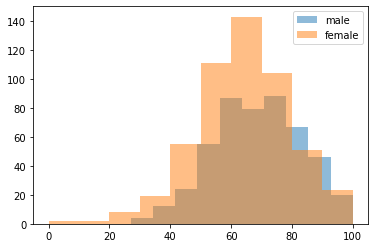



DescribeResult(nobs=482, minmax=(27, 100), mean=68.72821576763485, variance=206.10269493879454, skewness=-0.14481781915536418, kurtosis=-0.37462932029912643)
DescribeResult(nobs=518, minmax=(0, 100), mean=63.633204633204635, variance=239.98512355959164, skewness=-0.3310361428741697, kurtosis=0.5706543460911879)


ShapiroResult(statistic=0.9935630559921265, pvalue=0.03796108067035675)
ShapiroResult(statistic=0.9911796450614929, pvalue=0.0035164919681847095)


---------------------
 READING SCORE 
---------------------


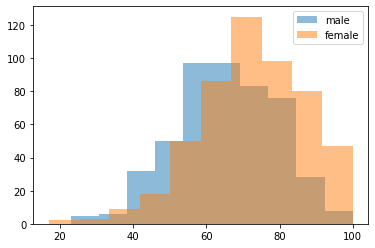



DescribeResult(nobs=482, minmax=(23, 100), mean=65.47302904564316, variance=194.09594465196125, skewness=-0.17090158028200161, kurtosis=-0.2077305544058241)
DescribeResult(nobs=518, minmax=(17, 100), mean=72.60810810810811, variance=206.73393799989546, skewness=-0.42091371386653176, kurtosis=0.2833337223422445)


ShapiroResult(statistic=0.9946237206459045, pvalue=0.08967796713113785)
ShapiroResult(statistic=0.9854959845542908, pvalue=4.9554357246961445e-05)


---------------------
 WRITING SCORE 
---------------------


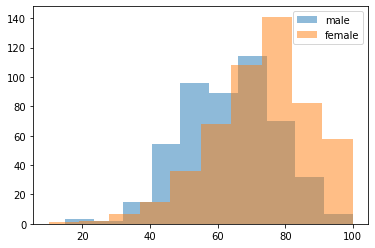



DescribeResult(nobs=482, minmax=(15, 100), mean=63.31120331950208, variance=199.2002484450617, skewness=-0.15443476339384618, kurtosis=-0.1727769676448725)
DescribeResult(nobs=518, minmax=(10, 100), mean=72.46718146718146, variance=220.36932705017813, skewness=-0.557584197681645, kurtosis=0.579158557542657)


ShapiroResult(statistic=0.9948088526725769, pvalue=0.10407906770706177)
ShapiroResult(statistic=0.9792451858520508, pvalue=9.895068160403753e-07)




In [63]:
# Visual Analysis, descriptive Statistics and Shapiro for normality

for var in ["math score", "reading score", "writing score"]:
  print("---------------------")
  print(" {} ".format(var).upper())
  print("---------------------")
  plt.hist(score_male[var], alpha = .5, label='male')
  plt.hist(score_female[var], alpha = .5, label='female')
  plt.legend()
  plt.show()

  print("\n")
  print(stats.describe(score_male[var]))
  print(stats.describe(score_female[var]))
  
  print("\n")
  print(stats.shapiro(score_male[var]))
  print(stats.shapiro(score_female[var]))
  print("\n")


    

> The histograms of the various scores are normally distributed and the values of skewness and kurtosis is within the specific range of normality. It is a good idea to check for normality with a statistical test before we proceed any further.  We use Shapiro Wilk here. The W statistic value from the Shapiro - Wilk test for all the 3 scores is close to 1 and it indicates that the distribution is close to normal.  

In [11]:
# Conduct the t-test

for var in ["math score", "reading score", "writing score"]:
  print(stats.ttest_ind(score_male[var], score_female[var]))

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)
Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)
Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)


> **Interpretation:** Based on a visual inspection, the values of skewness, kurtosis being within the range(descriptive statistics) and Shapiro-Wilk test, the scores are close enough to normally distributed. So, I proceeded with the t-test. Based on a p-value of 0.01, I **reject the null**. There **is significant difference in scores** between the **genders** for all 3 scores.  The following gives us an idea of the difference in their respective values.

In [70]:
#mean value of the scores w.r.t. Gender:

score_data.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


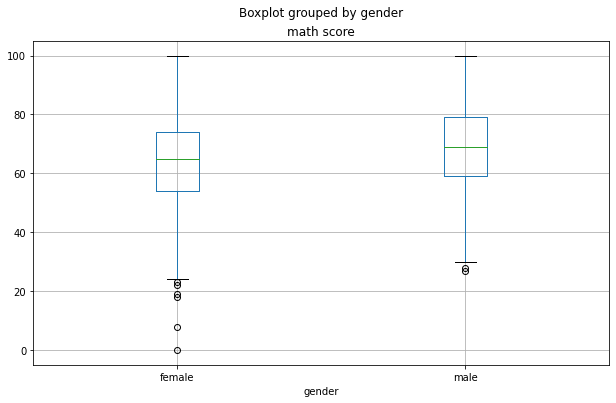

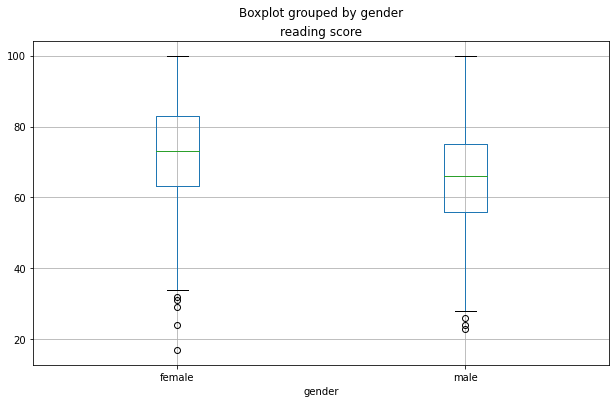

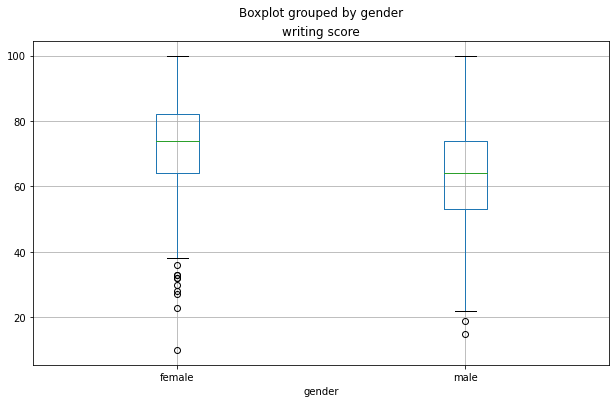

In [73]:
# box-plot to get the average difference in values:

score_data.boxplot('math score', by = 'gender', figsize=(10,6))
score_data.boxplot('reading score', by = 'gender', figsize=(10,6))
score_data.boxplot('writing score', by = 'gender', figsize=(10,6))

> **Interpretation:** The average difference in the math, reading and writing components are approximately found to be 5.1, -7.2 and -9.1 respectively for the gender variable.

> **b. Race/Ethinicity:** For testing the second hypothesis, I considered pairwise distribution of the scores between two selected groups. This was achieved with a nested for loop between the various racial groups. I also  created a loop for the analaysis of three scores, reading, writing and math. First I will check if the scores follow a normal distruibution visually using a histogram, then with the values of skewness and kurtosis (descriptive statistics). If the distribution of scores appear normal, an independent sample t-test will be performed between the two selected racial groups.


*****************************************
 MATH SCORE 
*****************************************
Comparison between group A and group B:
-------------------------------------------


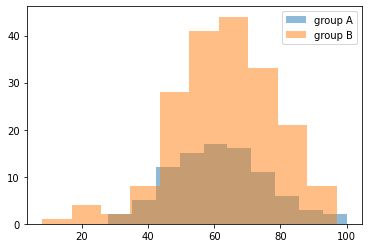

DescribeResult(nobs=89, minmax=(28, 100), mean=61.62921348314607, variance=210.91777323799795, skewness=0.2833081875546579, kurtosis=-0.13950218257958946)
DescribeResult(nobs=190, minmax=(8, 97), mean=63.45263157894737, variance=239.264940128098, skewness=-0.46520087415741856, kurtosis=0.7029024164513431)


ShapiroResult(statistic=0.991736114025116, pvalue=0.8545348644256592)
ShapiroResult(statistic=0.980807363986969, pvalue=0.010394944809377193)


-------------------------------------------
Comparison between group A and group C:
-------------------------------------------


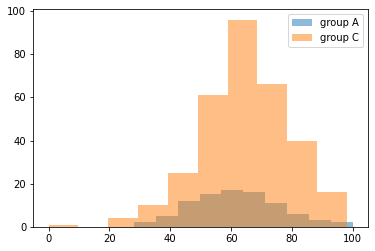

DescribeResult(nobs=89, minmax=(28, 100), mean=61.62921348314607, variance=210.91777323799795, skewness=0.2833081875546579, kurtosis=-0.13950218257958946)
DescribeResult(nobs=319, minmax=(0, 98), mean=64.46394984326018, variance=220.6016837207468, skewness=-0.30803996845001225, kurtosis=0.7042831205098312)


ShapiroResult(statistic=0.991736114025116, pvalue=0.8545348644256592)
ShapiroResult(statistic=0.9891065359115601, pvalue=0.017411569133400917)


-------------------------------------------
Comparison between group A and group D:
-------------------------------------------


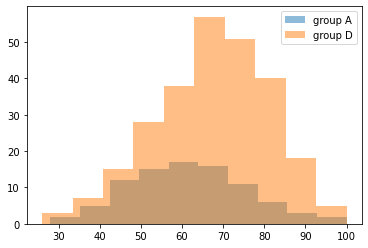

DescribeResult(nobs=89, minmax=(28, 100), mean=61.62921348314607, variance=210.91777323799795, skewness=0.2833081875546579, kurtosis=-0.13950218257958946)
DescribeResult(nobs=262, minmax=(26, 100), mean=67.36259541984732, variance=189.5959901728525, skewness=-0.3383092781188283, kurtosis=-0.08582174962989875)


ShapiroResult(statistic=0.991736114025116, pvalue=0.8545348644256592)
ShapiroResult(statistic=0.9896672964096069, pvalue=0.05927419662475586)


-------------------------------------------
Comparison between group A and group E:
-------------------------------------------


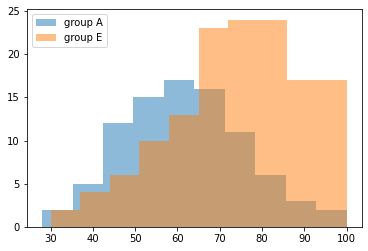

DescribeResult(nobs=89, minmax=(28, 100), mean=61.62921348314607, variance=210.91777323799795, skewness=0.2833081875546579, kurtosis=-0.13950218257958946)
DescribeResult(nobs=140, minmax=(30, 100), mean=73.82142857142857, variance=241.31320657759503, skewness=-0.46628986790496035, kurtosis=-0.09893607453678444)


ShapiroResult(statistic=0.991736114025116, pvalue=0.8545348644256592)
ShapiroResult(statistic=0.9770451784133911, pvalue=0.01849539391696453)


-------------------------------------------
Comparison between group B and group C:
-------------------------------------------


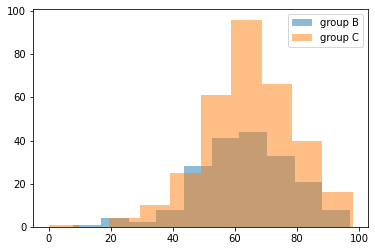

DescribeResult(nobs=190, minmax=(8, 97), mean=63.45263157894737, variance=239.264940128098, skewness=-0.46520087415741856, kurtosis=0.7029024164513431)
DescribeResult(nobs=319, minmax=(0, 98), mean=64.46394984326018, variance=220.6016837207468, skewness=-0.30803996845001225, kurtosis=0.7042831205098312)


ShapiroResult(statistic=0.980807363986969, pvalue=0.010394944809377193)
ShapiroResult(statistic=0.9891065359115601, pvalue=0.017411569133400917)


-------------------------------------------
Comparison between group B and group D:
-------------------------------------------


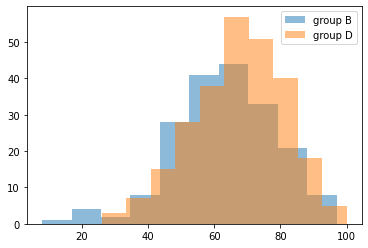

DescribeResult(nobs=190, minmax=(8, 97), mean=63.45263157894737, variance=239.264940128098, skewness=-0.46520087415741856, kurtosis=0.7029024164513431)
DescribeResult(nobs=262, minmax=(26, 100), mean=67.36259541984732, variance=189.5959901728525, skewness=-0.3383092781188283, kurtosis=-0.08582174962989875)


ShapiroResult(statistic=0.980807363986969, pvalue=0.010394944809377193)
ShapiroResult(statistic=0.9896672964096069, pvalue=0.05927419662475586)


-------------------------------------------
Comparison between group B and group E:
-------------------------------------------


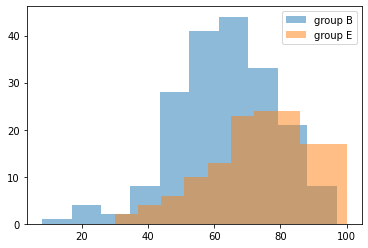

DescribeResult(nobs=190, minmax=(8, 97), mean=63.45263157894737, variance=239.264940128098, skewness=-0.46520087415741856, kurtosis=0.7029024164513431)
DescribeResult(nobs=140, minmax=(30, 100), mean=73.82142857142857, variance=241.31320657759503, skewness=-0.46628986790496035, kurtosis=-0.09893607453678444)


ShapiroResult(statistic=0.980807363986969, pvalue=0.010394944809377193)
ShapiroResult(statistic=0.9770451784133911, pvalue=0.01849539391696453)


-------------------------------------------
Comparison between group C and group D:
-------------------------------------------


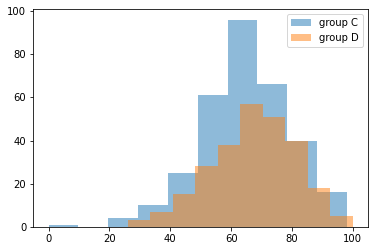

DescribeResult(nobs=319, minmax=(0, 98), mean=64.46394984326018, variance=220.6016837207468, skewness=-0.30803996845001225, kurtosis=0.7042831205098312)
DescribeResult(nobs=262, minmax=(26, 100), mean=67.36259541984732, variance=189.5959901728525, skewness=-0.3383092781188283, kurtosis=-0.08582174962989875)


ShapiroResult(statistic=0.9891065359115601, pvalue=0.017411569133400917)
ShapiroResult(statistic=0.9896672964096069, pvalue=0.05927419662475586)


-------------------------------------------
Comparison between group C and group E:
-------------------------------------------


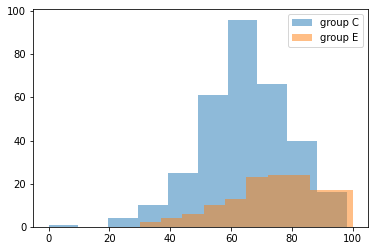

DescribeResult(nobs=319, minmax=(0, 98), mean=64.46394984326018, variance=220.6016837207468, skewness=-0.30803996845001225, kurtosis=0.7042831205098312)
DescribeResult(nobs=140, minmax=(30, 100), mean=73.82142857142857, variance=241.31320657759503, skewness=-0.46628986790496035, kurtosis=-0.09893607453678444)


ShapiroResult(statistic=0.9891065359115601, pvalue=0.017411569133400917)
ShapiroResult(statistic=0.9770451784133911, pvalue=0.01849539391696453)


-------------------------------------------
Comparison between group D and group E:
-------------------------------------------


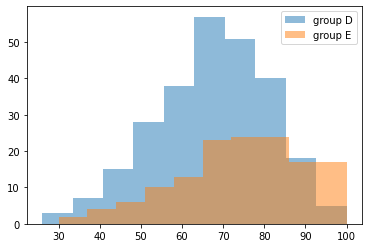

DescribeResult(nobs=262, minmax=(26, 100), mean=67.36259541984732, variance=189.5959901728525, skewness=-0.3383092781188283, kurtosis=-0.08582174962989875)
DescribeResult(nobs=140, minmax=(30, 100), mean=73.82142857142857, variance=241.31320657759503, skewness=-0.46628986790496035, kurtosis=-0.09893607453678444)


ShapiroResult(statistic=0.9896672964096069, pvalue=0.05927419662475586)
ShapiroResult(statistic=0.9770451784133911, pvalue=0.01849539391696453)


-------------------------------------------
*****************************************
 READING SCORE 
*****************************************
Comparison between group A and group B:
-------------------------------------------


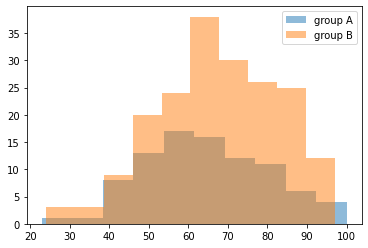

DescribeResult(nobs=89, minmax=(23, 100), mean=64.67415730337079, variance=241.60852911133813, skewness=0.06570407345348481, kurtosis=-0.29250595848882144)
DescribeResult(nobs=190, minmax=(24, 97), mean=67.35263157894737, variance=230.35647451963243, skewness=-0.280409780571402, kurtosis=-0.27911025241313636)


ShapiroResult(statistic=0.9909480810165405, pvalue=0.8038142919540405)
ShapiroResult(statistic=0.9855945110321045, pvalue=0.04913068562746048)


-------------------------------------------
Comparison between group A and group C:
-------------------------------------------


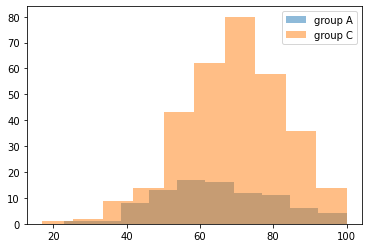

DescribeResult(nobs=89, minmax=(23, 100), mean=64.67415730337079, variance=241.60852911133813, skewness=0.06570407345348481, kurtosis=-0.29250595848882144)
DescribeResult(nobs=319, minmax=(17, 100), mean=69.10344827586206, variance=195.91693775753632, skewness=-0.4007333914851915, kurtosis=0.2133703864626164)


ShapiroResult(statistic=0.9909480810165405, pvalue=0.8038142919540405)
ShapiroResult(statistic=0.9885595440864563, pvalue=0.013015259057283401)


-------------------------------------------
Comparison between group A and group D:
-------------------------------------------


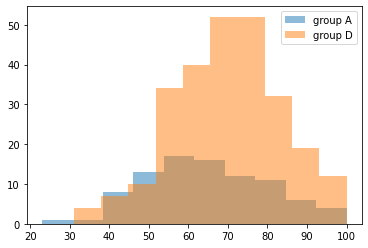

DescribeResult(nobs=89, minmax=(23, 100), mean=64.67415730337079, variance=241.60852911133813, skewness=0.06570407345348481, kurtosis=-0.29250595848882144)
DescribeResult(nobs=262, minmax=(31, 100), mean=70.03053435114504, variance=193.0795238513059, skewness=-0.1313411867459128, kurtosis=-0.1352478597285116)


ShapiroResult(statistic=0.9909480810165405, pvalue=0.8038142919540405)
ShapiroResult(statistic=0.9934107661247253, pvalue=0.3043957054615021)


-------------------------------------------
Comparison between group A and group E:
-------------------------------------------


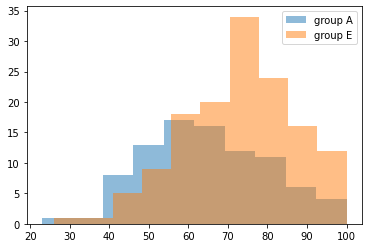

DescribeResult(nobs=89, minmax=(23, 100), mean=64.67415730337079, variance=241.60852911133813, skewness=0.06570407345348481, kurtosis=-0.29250595848882144)
DescribeResult(nobs=140, minmax=(26, 100), mean=73.02857142857142, variance=221.2365878725591, skewness=-0.3273331049341278, kurtosis=-0.03607118783950192)


ShapiroResult(statistic=0.9909480810165405, pvalue=0.8038142919540405)
ShapiroResult(statistic=0.9829714298248291, pvalue=0.07907983660697937)


-------------------------------------------
Comparison between group B and group C:
-------------------------------------------


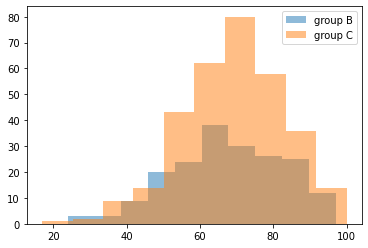

DescribeResult(nobs=190, minmax=(24, 97), mean=67.35263157894737, variance=230.35647451963243, skewness=-0.280409780571402, kurtosis=-0.27911025241313636)
DescribeResult(nobs=319, minmax=(17, 100), mean=69.10344827586206, variance=195.91693775753632, skewness=-0.4007333914851915, kurtosis=0.2133703864626164)


ShapiroResult(statistic=0.9855945110321045, pvalue=0.04913068562746048)
ShapiroResult(statistic=0.9885595440864563, pvalue=0.013015259057283401)


-------------------------------------------
Comparison between group B and group D:
-------------------------------------------


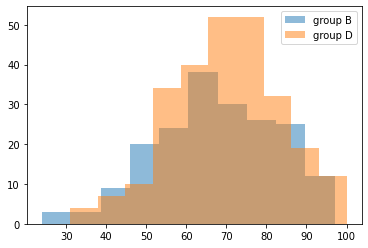

DescribeResult(nobs=190, minmax=(24, 97), mean=67.35263157894737, variance=230.35647451963243, skewness=-0.280409780571402, kurtosis=-0.27911025241313636)
DescribeResult(nobs=262, minmax=(31, 100), mean=70.03053435114504, variance=193.0795238513059, skewness=-0.1313411867459128, kurtosis=-0.1352478597285116)


ShapiroResult(statistic=0.9855945110321045, pvalue=0.04913068562746048)
ShapiroResult(statistic=0.9934107661247253, pvalue=0.3043957054615021)


-------------------------------------------
Comparison between group B and group E:
-------------------------------------------


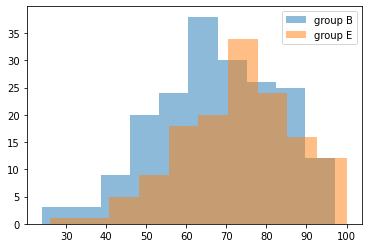

DescribeResult(nobs=190, minmax=(24, 97), mean=67.35263157894737, variance=230.35647451963243, skewness=-0.280409780571402, kurtosis=-0.27911025241313636)
DescribeResult(nobs=140, minmax=(26, 100), mean=73.02857142857142, variance=221.2365878725591, skewness=-0.3273331049341278, kurtosis=-0.03607118783950192)


ShapiroResult(statistic=0.9855945110321045, pvalue=0.04913068562746048)
ShapiroResult(statistic=0.9829714298248291, pvalue=0.07907983660697937)


-------------------------------------------
Comparison between group C and group D:
-------------------------------------------


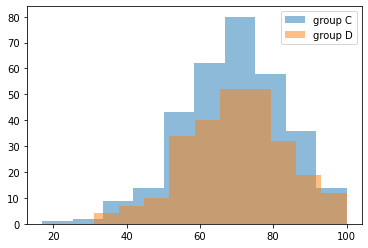

DescribeResult(nobs=319, minmax=(17, 100), mean=69.10344827586206, variance=195.91693775753632, skewness=-0.4007333914851915, kurtosis=0.2133703864626164)
DescribeResult(nobs=262, minmax=(31, 100), mean=70.03053435114504, variance=193.0795238513059, skewness=-0.1313411867459128, kurtosis=-0.1352478597285116)


ShapiroResult(statistic=0.9885595440864563, pvalue=0.013015259057283401)
ShapiroResult(statistic=0.9934107661247253, pvalue=0.3043957054615021)


-------------------------------------------
Comparison between group C and group E:
-------------------------------------------


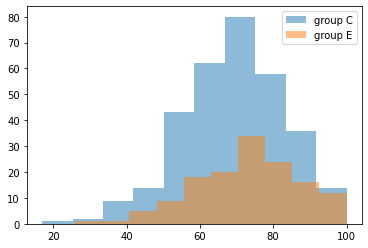

DescribeResult(nobs=319, minmax=(17, 100), mean=69.10344827586206, variance=195.91693775753632, skewness=-0.4007333914851915, kurtosis=0.2133703864626164)
DescribeResult(nobs=140, minmax=(26, 100), mean=73.02857142857142, variance=221.2365878725591, skewness=-0.3273331049341278, kurtosis=-0.03607118783950192)


ShapiroResult(statistic=0.9885595440864563, pvalue=0.013015259057283401)
ShapiroResult(statistic=0.9829714298248291, pvalue=0.07907983660697937)


-------------------------------------------
Comparison between group D and group E:
-------------------------------------------


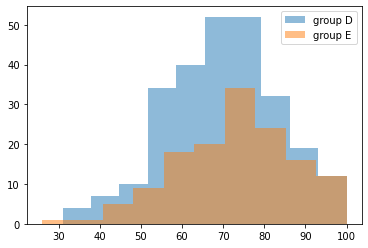

DescribeResult(nobs=262, minmax=(31, 100), mean=70.03053435114504, variance=193.0795238513059, skewness=-0.1313411867459128, kurtosis=-0.1352478597285116)
DescribeResult(nobs=140, minmax=(26, 100), mean=73.02857142857142, variance=221.2365878725591, skewness=-0.3273331049341278, kurtosis=-0.03607118783950192)


ShapiroResult(statistic=0.9934107661247253, pvalue=0.3043957054615021)
ShapiroResult(statistic=0.9829714298248291, pvalue=0.07907983660697937)


-------------------------------------------
*****************************************
 WRITING SCORE 
*****************************************
Comparison between group A and group B:
-------------------------------------------


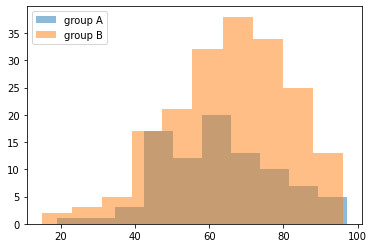

DescribeResult(nobs=89, minmax=(19, 97), mean=62.674157303370784, variance=239.26762002042904, skewness=0.045002631073375855, kurtosis=-0.3084754410856201)
DescribeResult(nobs=190, minmax=(15, 96), mean=65.6, variance=244.14603174603172, skewness=-0.4478913754424727, kurtosis=0.009788462691020516)


ShapiroResult(statistic=0.9881643056869507, pvalue=0.6042245030403137)
ShapiroResult(statistic=0.9826840758323669, pvalue=0.01896374113857746)


-------------------------------------------
Comparison between group A and group C:
-------------------------------------------


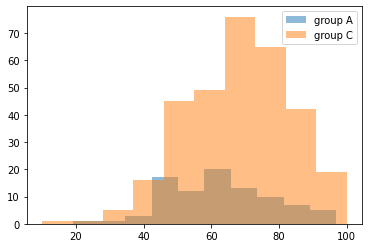

DescribeResult(nobs=89, minmax=(19, 97), mean=62.674157303370784, variance=239.26762002042904, skewness=0.045002631073375855, kurtosis=-0.3084754410856201)
DescribeResult(nobs=319, minmax=(10, 100), mean=67.82758620689656, variance=224.50162654521793, skewness=-0.3014721481231436, kurtosis=0.004058364836578399)


ShapiroResult(statistic=0.9881643056869507, pvalue=0.6042245030403137)
ShapiroResult(statistic=0.9892812371253967, pvalue=0.01911652646958828)


-------------------------------------------
Comparison between group A and group D:
-------------------------------------------


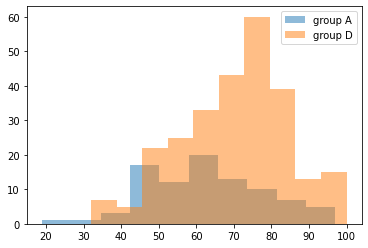

DescribeResult(nobs=89, minmax=(19, 97), mean=62.674157303370784, variance=239.26762002042904, skewness=0.045002631073375855, kurtosis=-0.3084754410856201)
DescribeResult(nobs=262, minmax=(32, 100), mean=70.14503816793894, variance=206.43099061156448, skewness=-0.17951131321289743, kurtosis=-0.20517735937524773)


ShapiroResult(statistic=0.9881643056869507, pvalue=0.6042245030403137)
ShapiroResult(statistic=0.98924320936203, pvalue=0.048992667347192764)


-------------------------------------------
Comparison between group A and group E:
-------------------------------------------


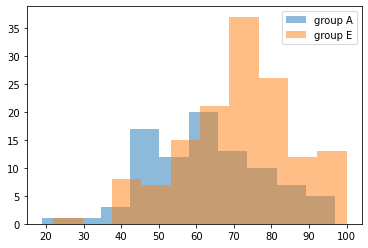

DescribeResult(nobs=89, minmax=(19, 97), mean=62.674157303370784, variance=239.26762002042904, skewness=0.045002631073375855, kurtosis=-0.3084754410856201)
DescribeResult(nobs=140, minmax=(22, 100), mean=71.40714285714286, variance=228.4301644398767, skewness=-0.34453166444612554, kurtosis=0.1489198364906379)


ShapiroResult(statistic=0.9881643056869507, pvalue=0.6042245030403137)
ShapiroResult(statistic=0.9824419021606445, pvalue=0.06937512755393982)


-------------------------------------------
Comparison between group B and group C:
-------------------------------------------


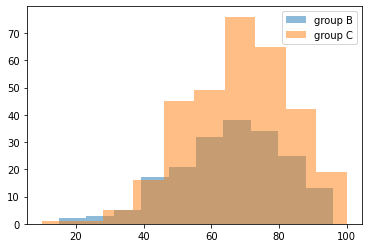

DescribeResult(nobs=190, minmax=(15, 96), mean=65.6, variance=244.14603174603172, skewness=-0.4478913754424727, kurtosis=0.009788462691020516)
DescribeResult(nobs=319, minmax=(10, 100), mean=67.82758620689656, variance=224.50162654521793, skewness=-0.3014721481231436, kurtosis=0.004058364836578399)


ShapiroResult(statistic=0.9826840758323669, pvalue=0.01896374113857746)
ShapiroResult(statistic=0.9892812371253967, pvalue=0.01911652646958828)


-------------------------------------------
Comparison between group B and group D:
-------------------------------------------


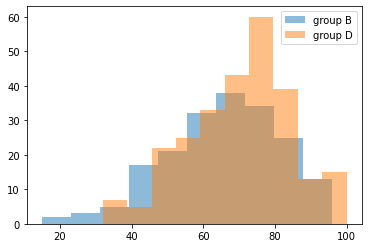

DescribeResult(nobs=190, minmax=(15, 96), mean=65.6, variance=244.14603174603172, skewness=-0.4478913754424727, kurtosis=0.009788462691020516)
DescribeResult(nobs=262, minmax=(32, 100), mean=70.14503816793894, variance=206.43099061156448, skewness=-0.17951131321289743, kurtosis=-0.20517735937524773)


ShapiroResult(statistic=0.9826840758323669, pvalue=0.01896374113857746)
ShapiroResult(statistic=0.98924320936203, pvalue=0.048992667347192764)


-------------------------------------------
Comparison between group B and group E:
-------------------------------------------


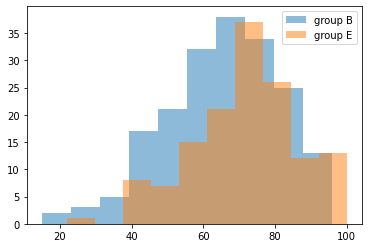

DescribeResult(nobs=190, minmax=(15, 96), mean=65.6, variance=244.14603174603172, skewness=-0.4478913754424727, kurtosis=0.009788462691020516)
DescribeResult(nobs=140, minmax=(22, 100), mean=71.40714285714286, variance=228.4301644398767, skewness=-0.34453166444612554, kurtosis=0.1489198364906379)


ShapiroResult(statistic=0.9826840758323669, pvalue=0.01896374113857746)
ShapiroResult(statistic=0.9824419021606445, pvalue=0.06937512755393982)


-------------------------------------------
Comparison between group C and group D:
-------------------------------------------


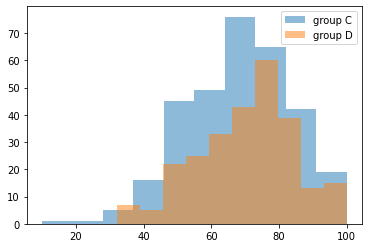

DescribeResult(nobs=319, minmax=(10, 100), mean=67.82758620689656, variance=224.50162654521793, skewness=-0.3014721481231436, kurtosis=0.004058364836578399)
DescribeResult(nobs=262, minmax=(32, 100), mean=70.14503816793894, variance=206.43099061156448, skewness=-0.17951131321289743, kurtosis=-0.20517735937524773)


ShapiroResult(statistic=0.9892812371253967, pvalue=0.01911652646958828)
ShapiroResult(statistic=0.98924320936203, pvalue=0.048992667347192764)


-------------------------------------------
Comparison between group C and group E:
-------------------------------------------


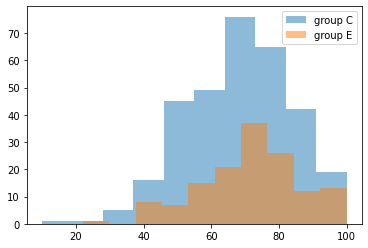

DescribeResult(nobs=319, minmax=(10, 100), mean=67.82758620689656, variance=224.50162654521793, skewness=-0.3014721481231436, kurtosis=0.004058364836578399)
DescribeResult(nobs=140, minmax=(22, 100), mean=71.40714285714286, variance=228.4301644398767, skewness=-0.34453166444612554, kurtosis=0.1489198364906379)


ShapiroResult(statistic=0.9892812371253967, pvalue=0.01911652646958828)
ShapiroResult(statistic=0.9824419021606445, pvalue=0.06937512755393982)


-------------------------------------------
Comparison between group D and group E:
-------------------------------------------


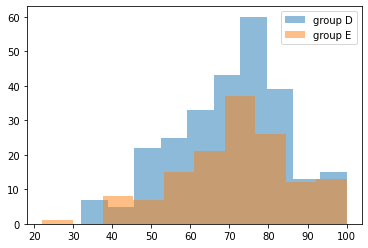

DescribeResult(nobs=262, minmax=(32, 100), mean=70.14503816793894, variance=206.43099061156448, skewness=-0.17951131321289743, kurtosis=-0.20517735937524773)
DescribeResult(nobs=140, minmax=(22, 100), mean=71.40714285714286, variance=228.4301644398767, skewness=-0.34453166444612554, kurtosis=0.1489198364906379)


ShapiroResult(statistic=0.98924320936203, pvalue=0.048992667347192764)
ShapiroResult(statistic=0.9824419021606445, pvalue=0.06937512755393982)


-------------------------------------------


In [64]:
# pair-wise distribution of three scores among races, visual, descriptive, and Shapiro-Wilk test

race = np.sort(score_data["race/ethnicity"].unique())
for var in ["math score", "reading score", "writing score"]:
    print("*****************************************")
    print(" {} ".format(var).upper())
    print("*****************************************")
    for i in range(0, len(race)):
      for j in range(i+1, len(race)):
        print("Comparison between {0} and {1}:".format(race[i], race[j]))
        print("-------------------------------------------")
        plt.hist(score_data[score_data["race/ethnicity"]== race[i]][var], alpha = .5, label=race[i])
        plt.hist(score_data[score_data["race/ethnicity"]== race[j]][var], alpha = .5, label=race[j])
        plt.legend()
        plt.show()
      
        print(stats.describe(score_data[score_data["race/ethnicity"]== race[i]][var]))
        print(stats.describe(score_data[score_data["race/ethnicity"]== race[j]][var]))
        
        print("\n")
        print(stats.shapiro(score_data[score_data["race/ethnicity"]== race[i]][var]))
        print(stats.shapiro(score_data[score_data["race/ethnicity"]== race[j]][var]))

        print("\n")
        print("-------------------------------------------")

> The histograms of the various scores are normally distributed, the values of skewness and kurtosis is within the specific range of normality. It is a good idea to check for normality with a statistical test before we proceed any further.  We use Shapiro Wilk here. The W statistic value from the Shapiro - Wilk test for all the 3 scores is close to 1 and it indicates that the distribution is close to normal.  Hence we will proceed the independent sample t-test.

In [16]:
# pair-wise t-test for different racial groups

race = np.sort(score_data["race/ethnicity"].unique())
for var in ["math score", "reading score", "writing score"]:
    print("*******************************************")
    print(" {} ".format(var).upper())
    print("*******************************************")
    for i in range(0, len(race)):
      for j in range(i+1, len(race)):
        print("Comparison between {0} and {1}:".format(race[i], race[j]))
        print("-------------------------------------------")
        print(stats.ttest_ind(
                score_data[score_data["race/ethnicity"]== race[i]][var],
                score_data[score_data["race/ethnicity"] == race[j]][var]
            ))
        print("\n")
        print("-------------------------------------------")

*******************************************
 MATH SCORE 
*******************************************
Comparison between group A and group B:
-------------------------------------------
Ttest_indResult(statistic=-0.9355076279747488, pvalue=0.3503415961659957)


-------------------------------------------
Comparison between group A and group C:
-------------------------------------------
Ttest_indResult(statistic=-1.5997220303217299, pvalue=0.11043810745588042)


-------------------------------------------
Comparison between group A and group D:
-------------------------------------------
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)


-------------------------------------------
Comparison between group A and group E:
-------------------------------------------
Ttest_indResult(statistic=-5.936141025544798, pvalue=1.083559122656415e-08)


-------------------------------------------
Comparison between group B and group C:
-------------------------------------

> **Interpretation:** Based on a visual inspection, the values of skewness, kurtosis being within the range(descriptive statistics), and Shapiro-Wilk test, we can say the scores are close enough to normally distributed. So, I proceeded with the t-test. The p-value cut-off is at 0.01. The following table illustrates the result of t-tests. A value of **'0'** means null hypothesis **stands** and a value of **'1'** means **rejection** of null hypothesis.

In [23]:

# Function to generate table of pair-wise t-test results

from IPython.display import HTML, display


# Function to generate table

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
    

# results fed to get a table

data = [['', 'A', 'B', 'C', 'D', 'E'],['A','-',0,0,1,1],['B',0,'-',0,1,1], ['C',0,0,'-',0,1], ['D',1,1,0,'-',1],['E',1,1,1,1,'-']]
print("\n")
print("Table of t-test results: MATH")
print("-------------------------")
display_table(data)
print("\n")

data = [['', 'A', 'B', 'C', 'D', 'E'],['A','-',0,0,1,1],['B',0,'-',0,0,1], ['C',0,0,'-',0,1], ['D',1,0,0,'-',0],['E',1,1,1,0,'-']]
print("\n")
print("Table of t-test results: READING")
print("-------------------------")
display_table(data)
print("\n")

data = [['', 'A', 'B', 'C', 'D', 'E'],['A','-',0,1,1,1],['B',0,'-',0,1,1], ['C',1,0,'-',0,0], ['D',1,1,0,'-',0],['E',1,1,0,0,'-']]
print("\n")
print("Table of t-test results: WRITING")
print("-------------------------")
display_table(data)
print("\n")



Table of t-test results: MATH
-------------------------






Table of t-test results: READING
-------------------------






Table of t-test results: WRITING
-------------------------


In [13]:
# mean scores w.r.t. races
score_data.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


> **Interpretation:** The above table gives the mean scores of all five racial groups in all three categories of scoring. It can be used to understand the t-test results better.

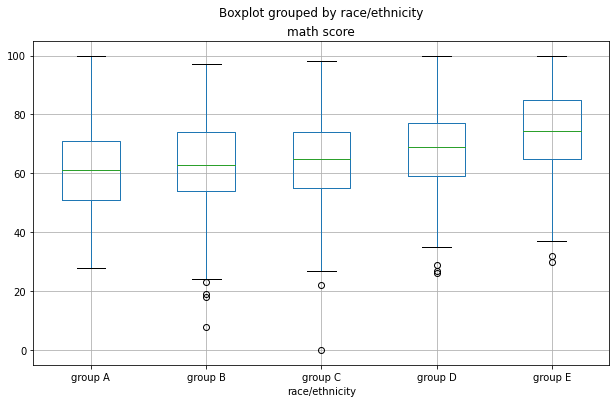

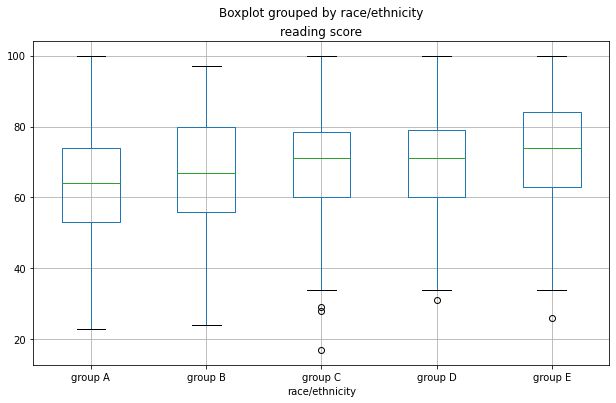

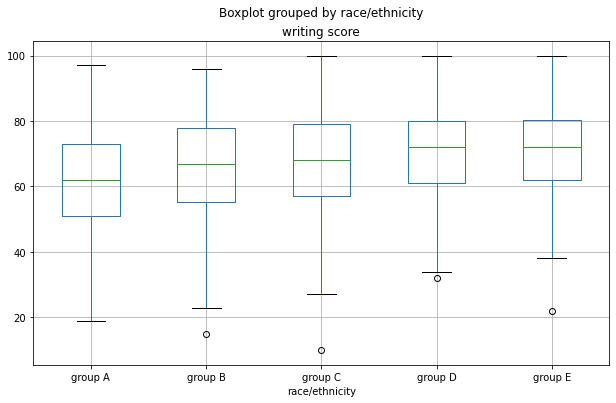

In [77]:
# box-plot to get the average difference in values:

score_data.boxplot('math score', by = 'race/ethnicity', figsize=(10,6))
score_data.boxplot('reading score', by = 'race/ethnicity', figsize=(10,6))
score_data.boxplot('writing score', by = 'race/ethnicity', figsize=(10,6))

> From this boxplot we can understand that group E outperforms every other group in all three scores.  The average difference in highest and lowest scores in those categories are 12.2, 8.3 and 8.7.  Performance of group A is the lowest in this category.

> **c. Parental Level of Education:** For testing the third hypothesis, I considered pairwise distribution of the scores between two selected levels of education. This was achieves with a nested for loop between the various levels of education. I also created a loop for the analaysis of three scores, reading, writing and math. First I will check if the scores follow a normal distruibution visually using a histogram, then with the values of skewness and kurtosis (descriptive statistics). If the distribution of scores appear normal, an independent sample t-test will be performed between the two selected education levels. Since, all the scores followed normal distribution, we are proceeding with the t-test.  The part of the code which shows he distribution of scores among different education levels is not included here for simplicity.

*****************************************
 MATH SCORE 
*****************************************
Comparison between associate's degree and bachelor's degree:
-------------------------------------------


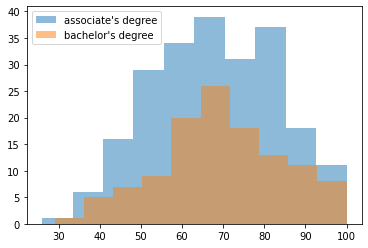

DescribeResult(nobs=222, minmax=(26, 100), mean=67.88288288288288, variance=228.37536178712654, skewness=0.00792559662959119, kurtosis=-0.6898190188103248)
DescribeResult(nobs=118, minmax=(29, 100), mean=69.38983050847457, variance=223.3168187744459, skewness=-0.11346241303503606, kurtosis=-0.24659998412210937)


ShapiroResult(statistic=0.9872363805770874, pvalue=0.044537000358104706)
ShapiroResult(statistic=0.9906343817710876, pvalue=0.6043269634246826)


-------------------------------------------
Comparison between associate's degree and high school:
-------------------------------------------


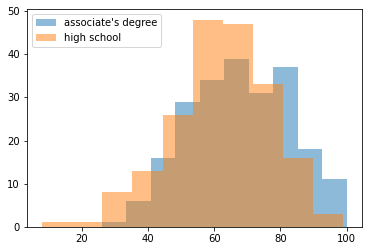

DescribeResult(nobs=222, minmax=(26, 100), mean=67.88288288288288, variance=228.37536178712654, skewness=0.00792559662959119, kurtosis=-0.6898190188103248)
DescribeResult(nobs=196, minmax=(8, 99), mean=62.13775510204081, variance=211.40143903715332, skewness=-0.44007287345329427, kurtosis=0.551793194485708)


ShapiroResult(statistic=0.9872363805770874, pvalue=0.044537000358104706)
ShapiroResult(statistic=0.9868261218070984, pvalue=0.06518671661615372)


-------------------------------------------
Comparison between associate's degree and master's degree:
-------------------------------------------


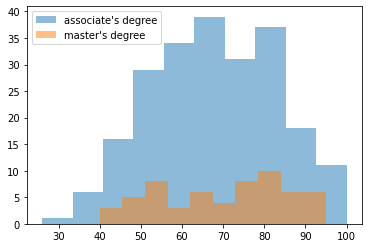

DescribeResult(nobs=222, minmax=(26, 100), mean=67.88288288288288, variance=228.37536178712654, skewness=0.00792559662959119, kurtosis=-0.6898190188103248)
DescribeResult(nobs=59, minmax=(40, 95), mean=69.7457627118644, variance=229.64114552893042, skewness=-0.22822968199877683, kurtosis=-1.0812234843425157)


ShapiroResult(statistic=0.9872363805770874, pvalue=0.044537000358104706)
ShapiroResult(statistic=0.9558513164520264, pvalue=0.03172202408313751)


-------------------------------------------
Comparison between associate's degree and some college:
-------------------------------------------


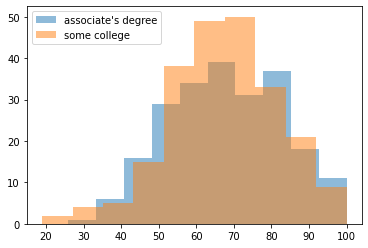

DescribeResult(nobs=222, minmax=(26, 100), mean=67.88288288288288, variance=228.37536178712654, skewness=0.00792559662959119, kurtosis=-0.6898190188103248)
DescribeResult(nobs=226, minmax=(19, 100), mean=67.1283185840708, variance=204.85901671583088, skewness=-0.22581614481762735, kurtosis=0.4990269191680916)


ShapiroResult(statistic=0.9872363805770874, pvalue=0.044537000358104706)
ShapiroResult(statistic=0.9894117712974548, pvalue=0.09587379544973373)


-------------------------------------------
Comparison between associate's degree and some high school:
-------------------------------------------


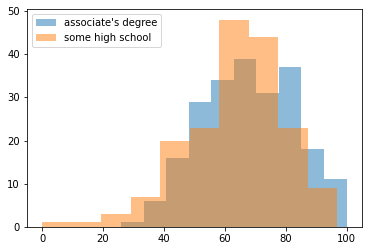

DescribeResult(nobs=222, minmax=(26, 100), mean=67.88288288288288, variance=228.37536178712654, skewness=0.00792559662959119, kurtosis=-0.6898190188103248)
DescribeResult(nobs=179, minmax=(0, 97), mean=63.497206703910614, variance=253.70083485029187, skewness=-0.6244411716216139, kurtosis=0.8359785272857518)


ShapiroResult(statistic=0.9872363805770874, pvalue=0.044537000358104706)
ShapiroResult(statistic=0.9773573875427246, pvalue=0.005163718946278095)


-------------------------------------------
Comparison between bachelor's degree and high school:
-------------------------------------------


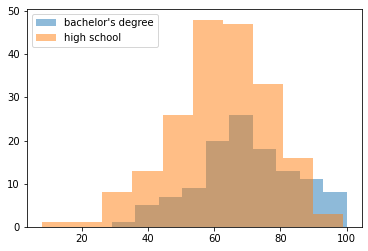

DescribeResult(nobs=118, minmax=(29, 100), mean=69.38983050847457, variance=223.3168187744459, skewness=-0.11346241303503606, kurtosis=-0.24659998412210937)
DescribeResult(nobs=196, minmax=(8, 99), mean=62.13775510204081, variance=211.40143903715332, skewness=-0.44007287345329427, kurtosis=0.551793194485708)


ShapiroResult(statistic=0.9906343817710876, pvalue=0.6043269634246826)
ShapiroResult(statistic=0.9868261218070984, pvalue=0.06518671661615372)


-------------------------------------------
Comparison between bachelor's degree and master's degree:
-------------------------------------------


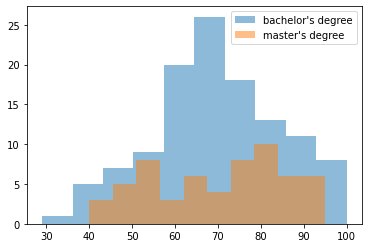

DescribeResult(nobs=118, minmax=(29, 100), mean=69.38983050847457, variance=223.3168187744459, skewness=-0.11346241303503606, kurtosis=-0.24659998412210937)
DescribeResult(nobs=59, minmax=(40, 95), mean=69.7457627118644, variance=229.64114552893042, skewness=-0.22822968199877683, kurtosis=-1.0812234843425157)


ShapiroResult(statistic=0.9906343817710876, pvalue=0.6043269634246826)
ShapiroResult(statistic=0.9558513164520264, pvalue=0.03172202408313751)


-------------------------------------------
Comparison between bachelor's degree and some college:
-------------------------------------------


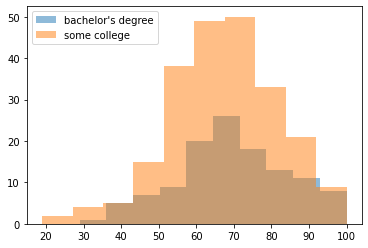

DescribeResult(nobs=118, minmax=(29, 100), mean=69.38983050847457, variance=223.3168187744459, skewness=-0.11346241303503606, kurtosis=-0.24659998412210937)
DescribeResult(nobs=226, minmax=(19, 100), mean=67.1283185840708, variance=204.85901671583088, skewness=-0.22581614481762735, kurtosis=0.4990269191680916)


ShapiroResult(statistic=0.9906343817710876, pvalue=0.6043269634246826)
ShapiroResult(statistic=0.9894117712974548, pvalue=0.09587379544973373)


-------------------------------------------
Comparison between bachelor's degree and some high school:
-------------------------------------------


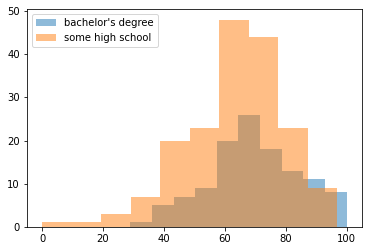

DescribeResult(nobs=118, minmax=(29, 100), mean=69.38983050847457, variance=223.3168187744459, skewness=-0.11346241303503606, kurtosis=-0.24659998412210937)
DescribeResult(nobs=179, minmax=(0, 97), mean=63.497206703910614, variance=253.70083485029187, skewness=-0.6244411716216139, kurtosis=0.8359785272857518)


ShapiroResult(statistic=0.9906343817710876, pvalue=0.6043269634246826)
ShapiroResult(statistic=0.9773573875427246, pvalue=0.005163718946278095)


-------------------------------------------
Comparison between high school and master's degree:
-------------------------------------------


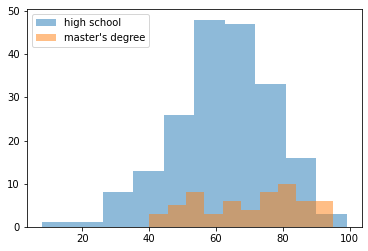

DescribeResult(nobs=196, minmax=(8, 99), mean=62.13775510204081, variance=211.40143903715332, skewness=-0.44007287345329427, kurtosis=0.551793194485708)
DescribeResult(nobs=59, minmax=(40, 95), mean=69.7457627118644, variance=229.64114552893042, skewness=-0.22822968199877683, kurtosis=-1.0812234843425157)


ShapiroResult(statistic=0.9868261218070984, pvalue=0.06518671661615372)
ShapiroResult(statistic=0.9558513164520264, pvalue=0.03172202408313751)


-------------------------------------------
Comparison between high school and some college:
-------------------------------------------


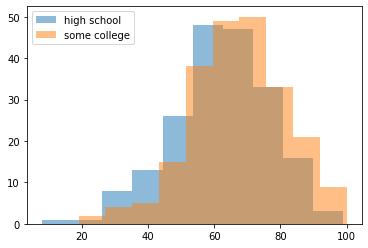

DescribeResult(nobs=196, minmax=(8, 99), mean=62.13775510204081, variance=211.40143903715332, skewness=-0.44007287345329427, kurtosis=0.551793194485708)
DescribeResult(nobs=226, minmax=(19, 100), mean=67.1283185840708, variance=204.85901671583088, skewness=-0.22581614481762735, kurtosis=0.4990269191680916)


ShapiroResult(statistic=0.9868261218070984, pvalue=0.06518671661615372)
ShapiroResult(statistic=0.9894117712974548, pvalue=0.09587379544973373)


-------------------------------------------
Comparison between high school and some high school:
-------------------------------------------


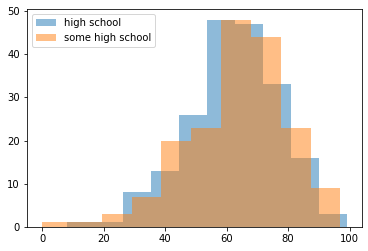

DescribeResult(nobs=196, minmax=(8, 99), mean=62.13775510204081, variance=211.40143903715332, skewness=-0.44007287345329427, kurtosis=0.551793194485708)
DescribeResult(nobs=179, minmax=(0, 97), mean=63.497206703910614, variance=253.70083485029187, skewness=-0.6244411716216139, kurtosis=0.8359785272857518)


ShapiroResult(statistic=0.9868261218070984, pvalue=0.06518671661615372)
ShapiroResult(statistic=0.9773573875427246, pvalue=0.005163718946278095)


-------------------------------------------
Comparison between master's degree and some college:
-------------------------------------------


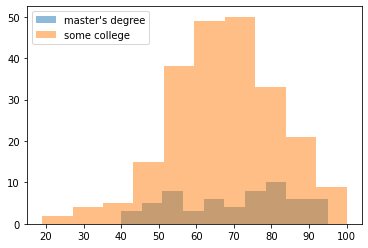

DescribeResult(nobs=59, minmax=(40, 95), mean=69.7457627118644, variance=229.64114552893042, skewness=-0.22822968199877683, kurtosis=-1.0812234843425157)
DescribeResult(nobs=226, minmax=(19, 100), mean=67.1283185840708, variance=204.85901671583088, skewness=-0.22581614481762735, kurtosis=0.4990269191680916)


ShapiroResult(statistic=0.9558513164520264, pvalue=0.03172202408313751)
ShapiroResult(statistic=0.9894117712974548, pvalue=0.09587379544973373)


-------------------------------------------
Comparison between master's degree and some high school:
-------------------------------------------


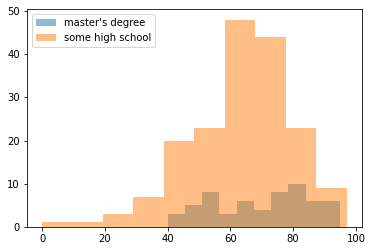

DescribeResult(nobs=59, minmax=(40, 95), mean=69.7457627118644, variance=229.64114552893042, skewness=-0.22822968199877683, kurtosis=-1.0812234843425157)
DescribeResult(nobs=179, minmax=(0, 97), mean=63.497206703910614, variance=253.70083485029187, skewness=-0.6244411716216139, kurtosis=0.8359785272857518)


ShapiroResult(statistic=0.9558513164520264, pvalue=0.03172202408313751)
ShapiroResult(statistic=0.9773573875427246, pvalue=0.005163718946278095)


-------------------------------------------
Comparison between some college and some high school:
-------------------------------------------


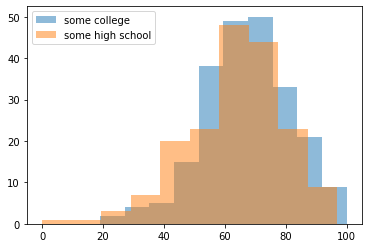

DescribeResult(nobs=226, minmax=(19, 100), mean=67.1283185840708, variance=204.85901671583088, skewness=-0.22581614481762735, kurtosis=0.4990269191680916)
DescribeResult(nobs=179, minmax=(0, 97), mean=63.497206703910614, variance=253.70083485029187, skewness=-0.6244411716216139, kurtosis=0.8359785272857518)


ShapiroResult(statistic=0.9894117712974548, pvalue=0.09587379544973373)
ShapiroResult(statistic=0.9773573875427246, pvalue=0.005163718946278095)


-------------------------------------------
*****************************************
 READING SCORE 
*****************************************
Comparison between associate's degree and bachelor's degree:
-------------------------------------------


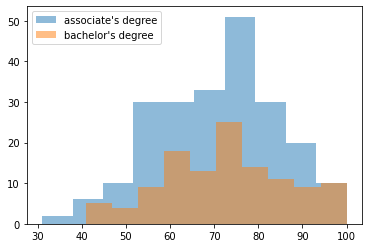

DescribeResult(nobs=222, minmax=(31, 100), mean=70.92792792792793, variance=192.34772328889977, skewness=-0.17054535459075226, kurtosis=-0.4427176631895988)
DescribeResult(nobs=118, minmax=(41, 100), mean=73.0, variance=204.06837606837607, skewness=0.03379596632770568, kurtosis=-0.44653370610498566)


ShapiroResult(statistic=0.9903920292854309, pvalue=0.14837950468063354)
ShapiroResult(statistic=0.9822501540184021, pvalue=0.12170372158288956)


-------------------------------------------
Comparison between associate's degree and high school:
-------------------------------------------


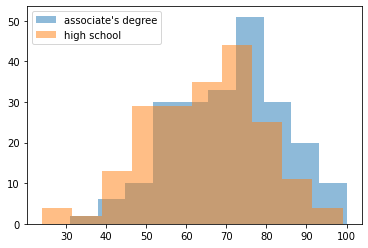

DescribeResult(nobs=222, minmax=(31, 100), mean=70.92792792792793, variance=192.34772328889977, skewness=-0.17054535459075226, kurtosis=-0.4427176631895988)
DescribeResult(nobs=196, minmax=(24, 99), mean=64.70408163265306, variance=199.7171114599686, skewness=-0.2753120856092697, kurtosis=-0.0683382189514381)


ShapiroResult(statistic=0.9903920292854309, pvalue=0.14837950468063354)
ShapiroResult(statistic=0.9903817772865295, pvalue=0.21488913893699646)


-------------------------------------------
Comparison between associate's degree and master's degree:
-------------------------------------------


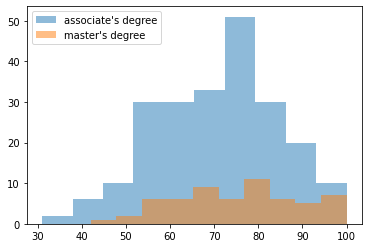

DescribeResult(nobs=222, minmax=(31, 100), mean=70.92792792792793, variance=192.34772328889977, skewness=-0.17054535459075226, kurtosis=-0.4427176631895988)
DescribeResult(nobs=59, minmax=(42, 100), mean=75.37288135593221, variance=189.7551139684395, skewness=-0.021186171734558723, kurtosis=-0.6976563618315303)


ShapiroResult(statistic=0.9903920292854309, pvalue=0.14837950468063354)
ShapiroResult(statistic=0.9788912534713745, pvalue=0.39467769861221313)


-------------------------------------------
Comparison between associate's degree and some college:
-------------------------------------------


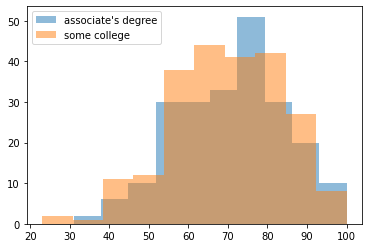

DescribeResult(nobs=222, minmax=(31, 100), mean=70.92792792792793, variance=192.34772328889977, skewness=-0.17054535459075226, kurtosis=-0.4427176631895988)
DescribeResult(nobs=226, minmax=(23, 100), mean=69.46017699115045, variance=197.60062930186822, skewness=-0.3723681827474283, kurtosis=-0.0011487762236317423)


ShapiroResult(statistic=0.9903920292854309, pvalue=0.14837950468063354)
ShapiroResult(statistic=0.9870172739028931, pvalue=0.037750352174043655)


-------------------------------------------
Comparison between associate's degree and some high school:
-------------------------------------------


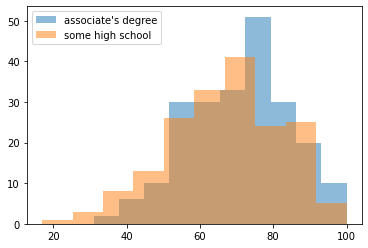

DescribeResult(nobs=222, minmax=(31, 100), mean=70.92792792792793, variance=192.34772328889977, skewness=-0.17054535459075226, kurtosis=-0.4427176631895988)
DescribeResult(nobs=179, minmax=(17, 100), mean=66.93854748603351, variance=239.6085619232942, skewness=-0.40474209670507694, kurtosis=-0.03619068537350145)


ShapiroResult(statistic=0.9903920292854309, pvalue=0.14837950468063354)
ShapiroResult(statistic=0.9853407144546509, pvalue=0.05821014195680618)


-------------------------------------------
Comparison between bachelor's degree and high school:
-------------------------------------------


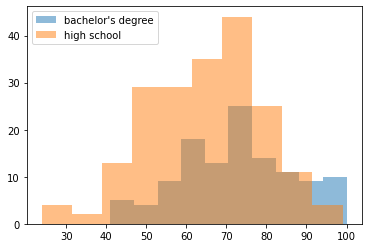

DescribeResult(nobs=118, minmax=(41, 100), mean=73.0, variance=204.06837606837607, skewness=0.03379596632770568, kurtosis=-0.44653370610498566)
DescribeResult(nobs=196, minmax=(24, 99), mean=64.70408163265306, variance=199.7171114599686, skewness=-0.2753120856092697, kurtosis=-0.0683382189514381)


ShapiroResult(statistic=0.9822501540184021, pvalue=0.12170372158288956)
ShapiroResult(statistic=0.9903817772865295, pvalue=0.21488913893699646)


-------------------------------------------
Comparison between bachelor's degree and master's degree:
-------------------------------------------


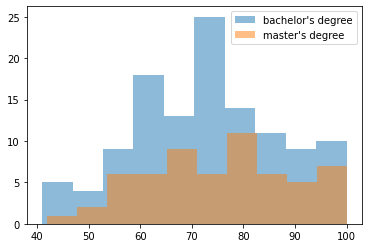

DescribeResult(nobs=118, minmax=(41, 100), mean=73.0, variance=204.06837606837607, skewness=0.03379596632770568, kurtosis=-0.44653370610498566)
DescribeResult(nobs=59, minmax=(42, 100), mean=75.37288135593221, variance=189.7551139684395, skewness=-0.021186171734558723, kurtosis=-0.6976563618315303)


ShapiroResult(statistic=0.9822501540184021, pvalue=0.12170372158288956)
ShapiroResult(statistic=0.9788912534713745, pvalue=0.39467769861221313)


-------------------------------------------
Comparison between bachelor's degree and some college:
-------------------------------------------


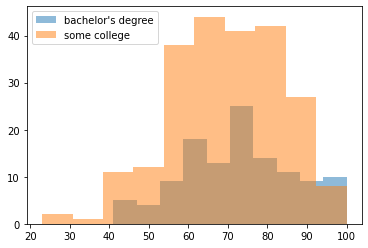

DescribeResult(nobs=118, minmax=(41, 100), mean=73.0, variance=204.06837606837607, skewness=0.03379596632770568, kurtosis=-0.44653370610498566)
DescribeResult(nobs=226, minmax=(23, 100), mean=69.46017699115045, variance=197.60062930186822, skewness=-0.3723681827474283, kurtosis=-0.0011487762236317423)


ShapiroResult(statistic=0.9822501540184021, pvalue=0.12170372158288956)
ShapiroResult(statistic=0.9870172739028931, pvalue=0.037750352174043655)


-------------------------------------------
Comparison between bachelor's degree and some high school:
-------------------------------------------


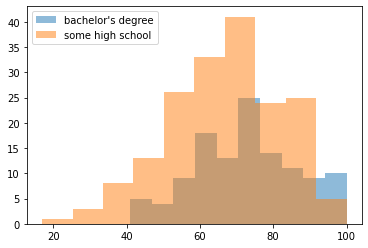

DescribeResult(nobs=118, minmax=(41, 100), mean=73.0, variance=204.06837606837607, skewness=0.03379596632770568, kurtosis=-0.44653370610498566)
DescribeResult(nobs=179, minmax=(17, 100), mean=66.93854748603351, variance=239.6085619232942, skewness=-0.40474209670507694, kurtosis=-0.03619068537350145)


ShapiroResult(statistic=0.9822501540184021, pvalue=0.12170372158288956)
ShapiroResult(statistic=0.9853407144546509, pvalue=0.05821014195680618)


-------------------------------------------
Comparison between high school and master's degree:
-------------------------------------------


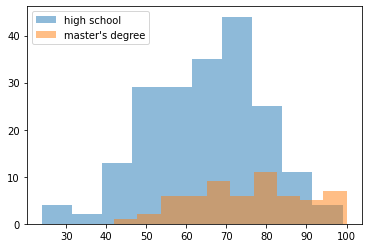

DescribeResult(nobs=196, minmax=(24, 99), mean=64.70408163265306, variance=199.7171114599686, skewness=-0.2753120856092697, kurtosis=-0.0683382189514381)
DescribeResult(nobs=59, minmax=(42, 100), mean=75.37288135593221, variance=189.7551139684395, skewness=-0.021186171734558723, kurtosis=-0.6976563618315303)


ShapiroResult(statistic=0.9903817772865295, pvalue=0.21488913893699646)
ShapiroResult(statistic=0.9788912534713745, pvalue=0.39467769861221313)


-------------------------------------------
Comparison between high school and some college:
-------------------------------------------


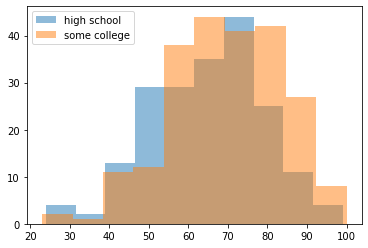

DescribeResult(nobs=196, minmax=(24, 99), mean=64.70408163265306, variance=199.7171114599686, skewness=-0.2753120856092697, kurtosis=-0.0683382189514381)
DescribeResult(nobs=226, minmax=(23, 100), mean=69.46017699115045, variance=197.60062930186822, skewness=-0.3723681827474283, kurtosis=-0.0011487762236317423)


ShapiroResult(statistic=0.9903817772865295, pvalue=0.21488913893699646)
ShapiroResult(statistic=0.9870172739028931, pvalue=0.037750352174043655)


-------------------------------------------
Comparison between high school and some high school:
-------------------------------------------


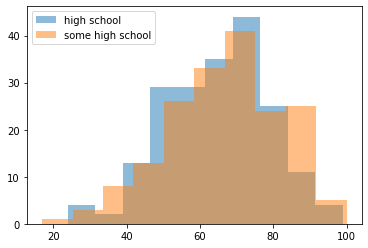

DescribeResult(nobs=196, minmax=(24, 99), mean=64.70408163265306, variance=199.7171114599686, skewness=-0.2753120856092697, kurtosis=-0.0683382189514381)
DescribeResult(nobs=179, minmax=(17, 100), mean=66.93854748603351, variance=239.6085619232942, skewness=-0.40474209670507694, kurtosis=-0.03619068537350145)


ShapiroResult(statistic=0.9903817772865295, pvalue=0.21488913893699646)
ShapiroResult(statistic=0.9853407144546509, pvalue=0.05821014195680618)


-------------------------------------------
Comparison between master's degree and some college:
-------------------------------------------


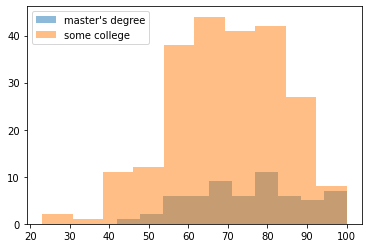

DescribeResult(nobs=59, minmax=(42, 100), mean=75.37288135593221, variance=189.7551139684395, skewness=-0.021186171734558723, kurtosis=-0.6976563618315303)
DescribeResult(nobs=226, minmax=(23, 100), mean=69.46017699115045, variance=197.60062930186822, skewness=-0.3723681827474283, kurtosis=-0.0011487762236317423)


ShapiroResult(statistic=0.9788912534713745, pvalue=0.39467769861221313)
ShapiroResult(statistic=0.9870172739028931, pvalue=0.037750352174043655)


-------------------------------------------
Comparison between master's degree and some high school:
-------------------------------------------


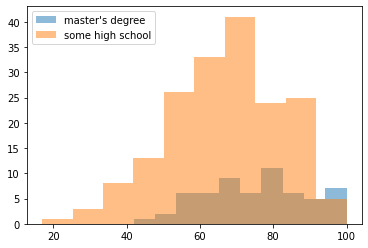

DescribeResult(nobs=59, minmax=(42, 100), mean=75.37288135593221, variance=189.7551139684395, skewness=-0.021186171734558723, kurtosis=-0.6976563618315303)
DescribeResult(nobs=179, minmax=(17, 100), mean=66.93854748603351, variance=239.6085619232942, skewness=-0.40474209670507694, kurtosis=-0.03619068537350145)


ShapiroResult(statistic=0.9788912534713745, pvalue=0.39467769861221313)
ShapiroResult(statistic=0.9853407144546509, pvalue=0.05821014195680618)


-------------------------------------------
Comparison between some college and some high school:
-------------------------------------------


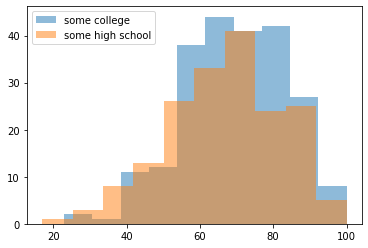

DescribeResult(nobs=226, minmax=(23, 100), mean=69.46017699115045, variance=197.60062930186822, skewness=-0.3723681827474283, kurtosis=-0.0011487762236317423)
DescribeResult(nobs=179, minmax=(17, 100), mean=66.93854748603351, variance=239.6085619232942, skewness=-0.40474209670507694, kurtosis=-0.03619068537350145)


ShapiroResult(statistic=0.9870172739028931, pvalue=0.037750352174043655)
ShapiroResult(statistic=0.9853407144546509, pvalue=0.05821014195680618)


-------------------------------------------
*****************************************
 WRITING SCORE 
*****************************************
Comparison between associate's degree and bachelor's degree:
-------------------------------------------


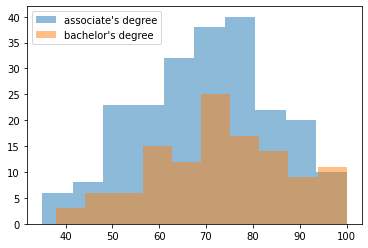

DescribeResult(nobs=222, minmax=(35, 100), mean=69.8963963963964, variance=204.8082222493987, skewness=-0.1359691710607803, kurtosis=-0.6143223367016915)
DescribeResult(nobs=118, minmax=(38, 100), mean=73.38135593220339, variance=216.92170070983624, skewness=-0.16706480735592882, kurtosis=-0.4399025424152194)


ShapiroResult(statistic=0.9880219101905823, pvalue=0.06016594544053078)
ShapiroResult(statistic=0.9836058616638184, pvalue=0.16141286492347717)


-------------------------------------------
Comparison between associate's degree and high school:
-------------------------------------------


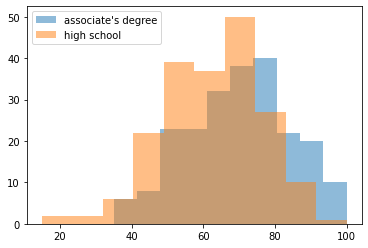

DescribeResult(nobs=222, minmax=(35, 100), mean=69.8963963963964, variance=204.8082222493987, skewness=-0.1359691710607803, kurtosis=-0.6143223367016915)
DescribeResult(nobs=196, minmax=(15, 100), mean=62.44897959183673, variance=198.41276818419675, skewness=-0.3305076026081769, kurtosis=0.055789011603205374)


ShapiroResult(statistic=0.9880219101905823, pvalue=0.06016594544053078)
ShapiroResult(statistic=0.9889573454856873, pvalue=0.1341456025838852)


-------------------------------------------
Comparison between associate's degree and master's degree:
-------------------------------------------


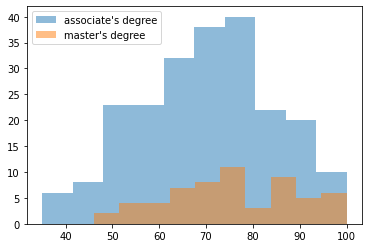

DescribeResult(nobs=222, minmax=(35, 100), mean=69.8963963963964, variance=204.8082222493987, skewness=-0.1359691710607803, kurtosis=-0.6143223367016915)
DescribeResult(nobs=59, minmax=(46, 100), mean=75.67796610169492, variance=188.53243717124488, skewness=-0.04687993765147028, kurtosis=-0.6829847801408078)


ShapiroResult(statistic=0.9880219101905823, pvalue=0.06016594544053078)
ShapiroResult(statistic=0.9793341755867004, pvalue=0.4123579263687134)


-------------------------------------------
Comparison between associate's degree and some college:
-------------------------------------------


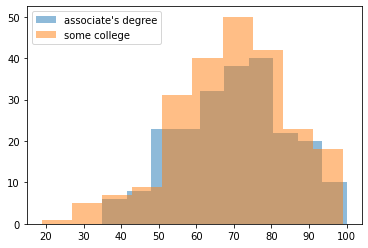

DescribeResult(nobs=222, minmax=(35, 100), mean=69.8963963963964, variance=204.8082222493987, skewness=-0.1359691710607803, kurtosis=-0.6143223367016915)
DescribeResult(nobs=226, minmax=(19, 99), mean=68.84070796460178, variance=225.37006882989184, skewness=-0.41902611851777444, kurtosis=0.10075895761103304)


ShapiroResult(statistic=0.9880219101905823, pvalue=0.06016594544053078)
ShapiroResult(statistic=0.9856770038604736, pvalue=0.022489292547106743)


-------------------------------------------
Comparison between associate's degree and some high school:
-------------------------------------------


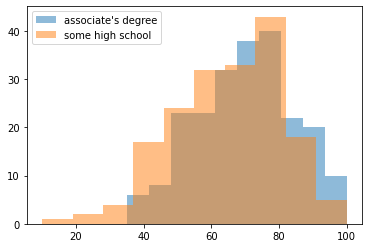

DescribeResult(nobs=222, minmax=(35, 100), mean=69.8963963963964, variance=204.8082222493987, skewness=-0.1359691710607803, kurtosis=-0.6143223367016915)
DescribeResult(nobs=179, minmax=(10, 100), mean=64.88826815642459, variance=247.62789529847467, skewness=-0.46155567652700474, kurtosis=0.10163089718544827)


ShapiroResult(statistic=0.9880219101905823, pvalue=0.06016594544053078)
ShapiroResult(statistic=0.9811372756958008, pvalue=0.015904972329735756)


-------------------------------------------
Comparison between bachelor's degree and high school:
-------------------------------------------


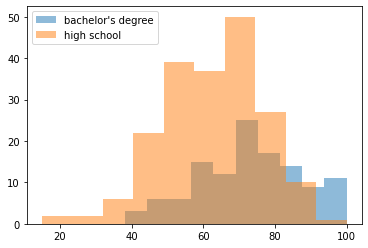

DescribeResult(nobs=118, minmax=(38, 100), mean=73.38135593220339, variance=216.92170070983624, skewness=-0.16706480735592882, kurtosis=-0.4399025424152194)
DescribeResult(nobs=196, minmax=(15, 100), mean=62.44897959183673, variance=198.41276818419675, skewness=-0.3305076026081769, kurtosis=0.055789011603205374)


ShapiroResult(statistic=0.9836058616638184, pvalue=0.16141286492347717)
ShapiroResult(statistic=0.9889573454856873, pvalue=0.1341456025838852)


-------------------------------------------
Comparison between bachelor's degree and master's degree:
-------------------------------------------


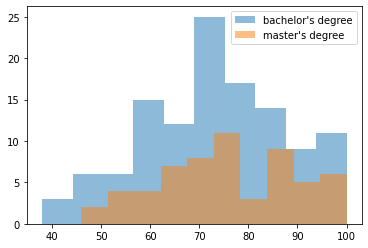

DescribeResult(nobs=118, minmax=(38, 100), mean=73.38135593220339, variance=216.92170070983624, skewness=-0.16706480735592882, kurtosis=-0.4399025424152194)
DescribeResult(nobs=59, minmax=(46, 100), mean=75.67796610169492, variance=188.53243717124488, skewness=-0.04687993765147028, kurtosis=-0.6829847801408078)


ShapiroResult(statistic=0.9836058616638184, pvalue=0.16141286492347717)
ShapiroResult(statistic=0.9793341755867004, pvalue=0.4123579263687134)


-------------------------------------------
Comparison between bachelor's degree and some college:
-------------------------------------------


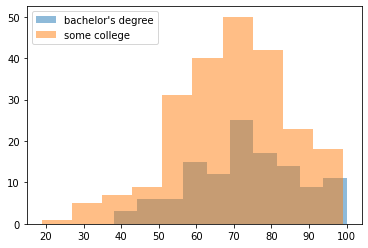

DescribeResult(nobs=118, minmax=(38, 100), mean=73.38135593220339, variance=216.92170070983624, skewness=-0.16706480735592882, kurtosis=-0.4399025424152194)
DescribeResult(nobs=226, minmax=(19, 99), mean=68.84070796460178, variance=225.37006882989184, skewness=-0.41902611851777444, kurtosis=0.10075895761103304)


ShapiroResult(statistic=0.9836058616638184, pvalue=0.16141286492347717)
ShapiroResult(statistic=0.9856770038604736, pvalue=0.022489292547106743)


-------------------------------------------
Comparison between bachelor's degree and some high school:
-------------------------------------------


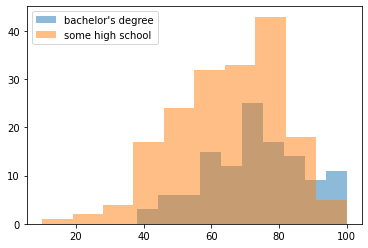

DescribeResult(nobs=118, minmax=(38, 100), mean=73.38135593220339, variance=216.92170070983624, skewness=-0.16706480735592882, kurtosis=-0.4399025424152194)
DescribeResult(nobs=179, minmax=(10, 100), mean=64.88826815642459, variance=247.62789529847467, skewness=-0.46155567652700474, kurtosis=0.10163089718544827)


ShapiroResult(statistic=0.9836058616638184, pvalue=0.16141286492347717)
ShapiroResult(statistic=0.9811372756958008, pvalue=0.015904972329735756)


-------------------------------------------
Comparison between high school and master's degree:
-------------------------------------------


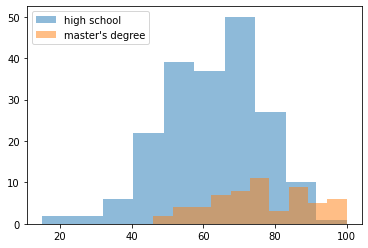

DescribeResult(nobs=196, minmax=(15, 100), mean=62.44897959183673, variance=198.41276818419675, skewness=-0.3305076026081769, kurtosis=0.055789011603205374)
DescribeResult(nobs=59, minmax=(46, 100), mean=75.67796610169492, variance=188.53243717124488, skewness=-0.04687993765147028, kurtosis=-0.6829847801408078)


ShapiroResult(statistic=0.9889573454856873, pvalue=0.1341456025838852)
ShapiroResult(statistic=0.9793341755867004, pvalue=0.4123579263687134)


-------------------------------------------
Comparison between high school and some college:
-------------------------------------------


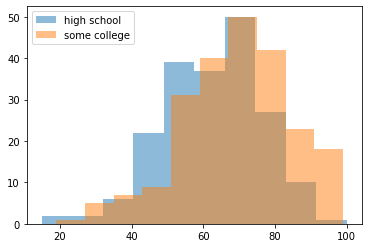

DescribeResult(nobs=196, minmax=(15, 100), mean=62.44897959183673, variance=198.41276818419675, skewness=-0.3305076026081769, kurtosis=0.055789011603205374)
DescribeResult(nobs=226, minmax=(19, 99), mean=68.84070796460178, variance=225.37006882989184, skewness=-0.41902611851777444, kurtosis=0.10075895761103304)


ShapiroResult(statistic=0.9889573454856873, pvalue=0.1341456025838852)
ShapiroResult(statistic=0.9856770038604736, pvalue=0.022489292547106743)


-------------------------------------------
Comparison between high school and some high school:
-------------------------------------------


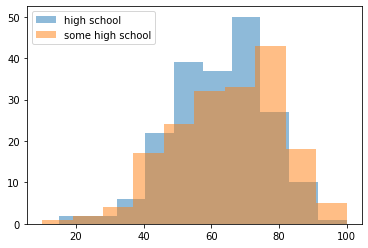

DescribeResult(nobs=196, minmax=(15, 100), mean=62.44897959183673, variance=198.41276818419675, skewness=-0.3305076026081769, kurtosis=0.055789011603205374)
DescribeResult(nobs=179, minmax=(10, 100), mean=64.88826815642459, variance=247.62789529847467, skewness=-0.46155567652700474, kurtosis=0.10163089718544827)


ShapiroResult(statistic=0.9889573454856873, pvalue=0.1341456025838852)
ShapiroResult(statistic=0.9811372756958008, pvalue=0.015904972329735756)


-------------------------------------------
Comparison between master's degree and some college:
-------------------------------------------


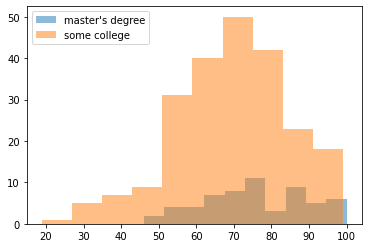

DescribeResult(nobs=59, minmax=(46, 100), mean=75.67796610169492, variance=188.53243717124488, skewness=-0.04687993765147028, kurtosis=-0.6829847801408078)
DescribeResult(nobs=226, minmax=(19, 99), mean=68.84070796460178, variance=225.37006882989184, skewness=-0.41902611851777444, kurtosis=0.10075895761103304)


ShapiroResult(statistic=0.9793341755867004, pvalue=0.4123579263687134)
ShapiroResult(statistic=0.9856770038604736, pvalue=0.022489292547106743)


-------------------------------------------
Comparison between master's degree and some high school:
-------------------------------------------


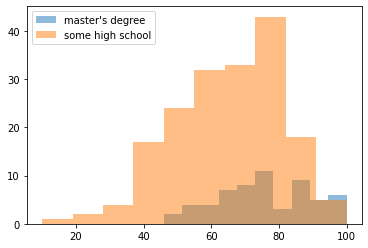

DescribeResult(nobs=59, minmax=(46, 100), mean=75.67796610169492, variance=188.53243717124488, skewness=-0.04687993765147028, kurtosis=-0.6829847801408078)
DescribeResult(nobs=179, minmax=(10, 100), mean=64.88826815642459, variance=247.62789529847467, skewness=-0.46155567652700474, kurtosis=0.10163089718544827)


ShapiroResult(statistic=0.9793341755867004, pvalue=0.4123579263687134)
ShapiroResult(statistic=0.9811372756958008, pvalue=0.015904972329735756)


-------------------------------------------
Comparison between some college and some high school:
-------------------------------------------


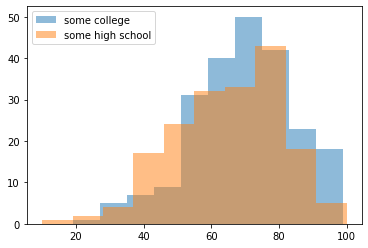

DescribeResult(nobs=226, minmax=(19, 99), mean=68.84070796460178, variance=225.37006882989184, skewness=-0.41902611851777444, kurtosis=0.10075895761103304)
DescribeResult(nobs=179, minmax=(10, 100), mean=64.88826815642459, variance=247.62789529847467, skewness=-0.46155567652700474, kurtosis=0.10163089718544827)


ShapiroResult(statistic=0.9856770038604736, pvalue=0.022489292547106743)
ShapiroResult(statistic=0.9811372756958008, pvalue=0.015904972329735756)


-------------------------------------------


In [65]:
# pair-wise distribution of three scores among parental level of education visual, descriptive, and Shapiro-Wilk test

ple = np.sort(score_data["parental level of education"].unique())
for var in ["math score", "reading score", "writing score"]:
    print("*****************************************")
    print(" {} ".format(var).upper())
    print("*****************************************")
    for i in range(0, len(ple)):
      for j in range(i+1, len(ple)):
        print("Comparison between {0} and {1}:".format(ple[i], ple[j]))
        print("-------------------------------------------")
        plt.hist(score_data[score_data["parental level of education"]== ple[i]][var], alpha = .5, label=ple[i])
        plt.hist(score_data[score_data["parental level of education"]== ple[j]][var], alpha = .5, label=ple[j])
        plt.legend()
        plt.show()
      
        print(stats.describe(score_data[score_data["parental level of education"]== ple[i]][var]))
        print(stats.describe(score_data[score_data["parental level of education"]== ple[j]][var]))
        
        print("\n")
        print(stats.shapiro(score_data[score_data["parental level of education"]== ple[i]][var]))
        print(stats.shapiro(score_data[score_data["parental level of education"]== ple[j]][var]))

        print("\n")
        print("-------------------------------------------")

> The histograms of the various scores are normally distributed, the values of skewness and kurtosis is within the specific range of normality. It is a good idea to check for normality with a statistical test before we proceed any further. We use Shapiro Wilk here. The W statistic value from the Shapiro - Wilk test for all the 3 scores is close to 1 and it indicates that the distribution is close to normal. Hence we will proceed the independent sample t-test.

In [37]:
#pair-wise t-test for various levels of education: 

#ple = np.sort(score_data["parental level of education"].unique())
# Re-arranges the sorted unique vales for easier interpretation
ple = ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree","master's degree"]
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var).upper())
    print("------------------------------------------------")
    for i in range(0, len(ple)):
        for j in range(i+1, len(ple)):
            print(
                "t-test between groups {0} and {1}:".format(ple[i], ple[j]))
            print(stats.ttest_ind(
                score_data[score_data["parental level of education"]
                           == ple[i]][var],
                score_data[score_data["parental level of education"]
                           == ple[j]][var]
            ))

------------------------------------------------
COMPARISONS FOR VARIABLE: MATH SCORE
------------------------------------------------
t-test between groups high school and some high school:
Ttest_indResult(statistic=-0.8640629490772553, pvalue=0.388108610360687)
t-test between groups high school and some college:
Ttest_indResult(statistic=-3.5461079495681163, pvalue=0.00043498004192453146)
t-test between groups high school and associate's degree:
Ttest_indResult(statistic=-3.9481325318265013, pvalue=9.247314274963044e-05)
t-test between groups high school and bachelor's degree:
Ttest_indResult(statistic=-4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups high school and master's degree:
Ttest_indResult(statistic=-3.4893759321890823, pvalue=0.000570929230228812)
t-test between groups some high school and some college:
Ttest_indResult(statistic=-2.4117046231407633, pvalue=0.016324361572645503)
t-test between groups some high school and associate's degree:
Ttest_indR

> **Interpretation:** Based on a visual inspection, the values of skewness, kurtosis being within the range(descriptive statistics) and Shapiro-Wilk, indicates that scores are close enough to normally distributed. So, I proceeded with the t-test. The p-value cut-off is at 0.01. The following table illustrates the result of t-tests. A value of **'0'** means null hypothesis **stands** and a value of **'1'** means **rejection** of null hypothesis.

In [43]:
# Function to generate table

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
    

# results fed to get a table

data = [['', 'highschool', 'some high school', 'some College', 'Associate', 'Bachelors','Masters'],['highschool','-',0,1,1,1,1],['some high school',0,'-',0,1,1,1], ['some College',1,0,'-',0,0,0], ['Associate',1,1,0,'-',0,0], ['Bachelors',1,1,0,0,'-',0], ['Masters',1,1,0,0,0,'-']]
print("\n")
print("Table of t-test results: MATH")
print("-----------------------------")
display_table(data)
print("\n")

data = [['', 'highschool', 'some high school', 'some College', 'Associate', 'Bachelors','Masters'],['highschool','-',0,1,1,1,1],['some high school',0,'-',0,1,1,1], ['some College',1,0,'-',0,0,1], ['Associate',1,1,0,'-',0,0], ['Bachelors',1,1,0,0,'-',0], ['Masters',1,1,1,0,0,'-']]
print("\n")
print("Table of t-test results: READING")
print("--------------------------------")
display_table(data)
print("\n")

data = [['', 'highschool', 'some high school', 'some College', 'Associate', 'Bachelors','Masters'],['highschool','-',0,1,1,1,1],['some high school',0,'-',0,1,1,1], ['some College',1,0,'-',0,1,1], ['Associate',1,1,0,'-',0,1], ['Bachelors',1,1,1,0,'-',0], ['Masters',1,1,1,1,0,'-']]
print("\n")
print("Table of t-test results: WRITING")
print("--------------------------------")
display_table(data)
print("\n")



Table of t-test results: MATH
-----------------------------






Table of t-test results: READING
--------------------------------






Table of t-test results: WRITING
--------------------------------


In [44]:
score_data.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


> **Interpretation:** The above mean values of the three categories of test scores helps us to understand the interpretion of the t-test results better. 

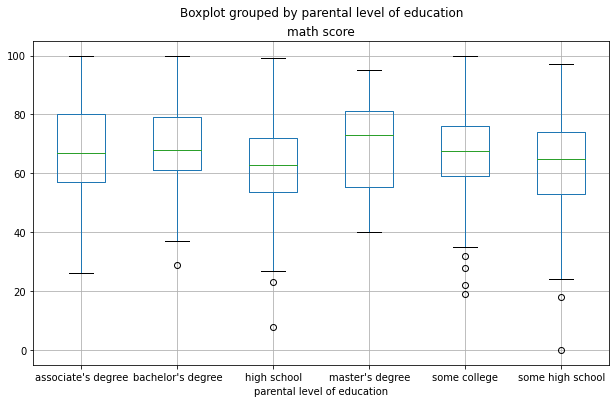

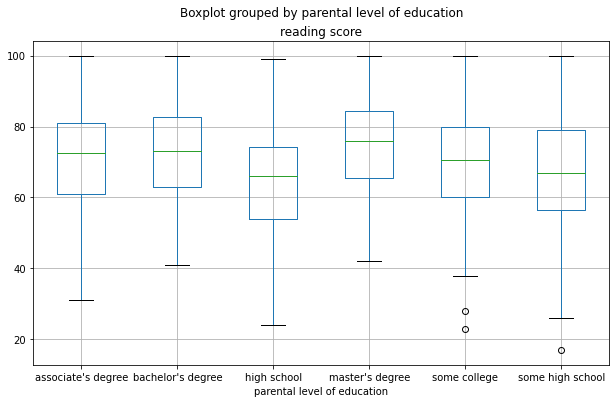

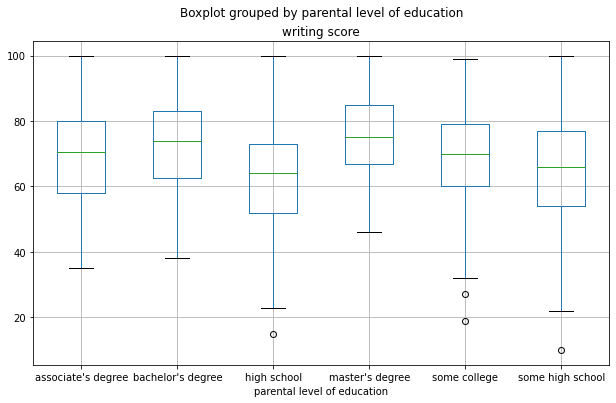

In [76]:
# box-plot to get the average difference in values:

score_data.boxplot('math score', by = 'parental level of education', figsize=(10,6))
score_data.boxplot('reading score', by = 'parental level of education', figsize=(10,6))
score_data.boxplot('writing score', by = 'parental level of education', figsize=(10,6))

> From this boxplot we can understand that students with parents having Masters degree outperform every other group in all three scores.  The average difference in highest and lowest scores in those categories are 7.6, 10.7 and 13.23.7.  Performance of students with parents with high school qualification is the lowest in this category.

> **d. Lunch Preference:** For testing the fourth hypothesis, the data is split into to separate dataframes for the two preferences. First I will check if the scores follow a normal distruibution visually using a histogram, then with the values of skewness and kurtosis (descriptive statistics). If the distribution of scores appear normal, an independent sample t-test will be performed between the two genders.

-----------------------------------------
 MATH SCORE 
-----------------------------------------


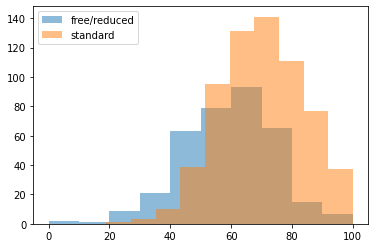

DescribeResult(nobs=355, minmax=(0, 100), mean=58.92112676056338, variance=229.82426991326489, skewness=-0.3103669047566783, kurtosis=0.37574742282962337)
DescribeResult(nobs=645, minmax=(19, 100), mean=70.03410852713178, variance=186.41808946025327, skewness=-0.10227791528025207, kurtosis=-0.14724460660398364)


ShapiroResult(statistic=0.9924980998039246, pvalue=0.07163193076848984)
ShapiroResult(statistic=0.9944112300872803, pvalue=0.018129942938685417)


-----------------------------------------
 READING SCORE 
-----------------------------------------


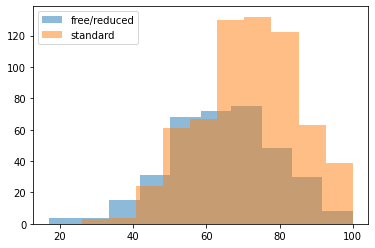

DescribeResult(nobs=355, minmax=(17, 100), mean=64.65352112676057, variance=221.87113869658629, skewness=-0.2357872948469079, kurtosis=-0.01864720452897517)
DescribeResult(nobs=645, minmax=(26, 100), mean=71.65426356589147, variance=191.28556020992824, skewness=-0.21159651296215973, kurtosis=-0.23106807838349042)


ShapiroResult(statistic=0.9934403896331787, pvalue=0.12586839497089386)
ShapiroResult(statistic=0.9925457835197449, pvalue=0.0026014416944235563)


-----------------------------------------
 WRITING SCORE 
-----------------------------------------


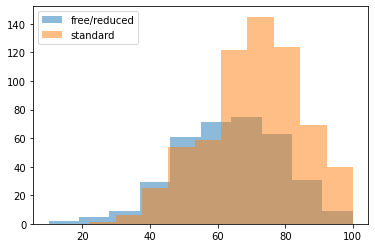

DescribeResult(nobs=355, minmax=(10, 100), mean=63.02253521126761, variance=238.20288056019737, skewness=-0.252080345609079, kurtosis=0.09846517651106801)
DescribeResult(nobs=645, minmax=(22, 100), mean=70.8232558139535, variance=205.62088689874338, skewness=-0.25336629439307656, kurtosis=-0.23923873356757985)


ShapiroResult(statistic=0.9937123656272888, pvalue=0.14779680967330933)
ShapiroResult(statistic=0.9907597303390503, pvalue=0.00045595125993713737)




In [67]:
# Visual, descriptive Statistics, Shapiro-Wilk:

for var in ["math score", "reading score", "writing score"]:
  print("-----------------------------------------")
  print(" {} ".format(var).upper())
  print("-----------------------------------------")
  plt.hist(score_data[score_data.lunch == "free/reduced"][var], alpha = .5, label='free/reduced')
  plt.hist(score_data[score_data.lunch == "standard"][var], alpha = .5, label='standard')
  plt.legend()
  plt.show()

  print(stats.describe(score_data[score_data.lunch == "free/reduced"][var]))
  print(stats.describe(score_data[score_data.lunch == "standard"][var]))

  print("\n")
  print(stats.shapiro(score_data[score_data.lunch == "free/reduced"][var]))
  print(stats.shapiro(score_data[score_data.lunch == "standard"][var]))
  print("\n")

> The histograms of the various scores are normally distributed and the values of skewness and kurtosis is within the specific range of normality. It is a good idea to check for normality with a statistical test before we proceed any further.  We use Shapiro Wilk here. The W statistic value from the Shapiro - Wilk test for all the 3 scores is close to 1 and it indicates that the distribution is close to normal.  

In [52]:
# perform t-test

stats.ttest_ind(score_data[score_data.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          score_data[score_data.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

> **Interpretation:** Based on a visual inspection and the values of skewness, kurtosis being within the range(descriptive statistics) and Shapiro-Wilk, indicates that scores are close enough to normally distributed. Based on a p-value of 0.01, I **reject the null hypothesis.** There **is significant difference** in scores between the **lunch preferences** for all 3 scores.  The following mean values illustrates the results.

In [53]:
# mean scores within lunch categories

score_data.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


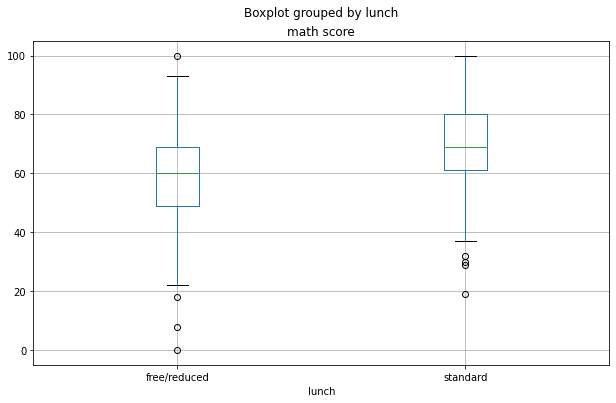

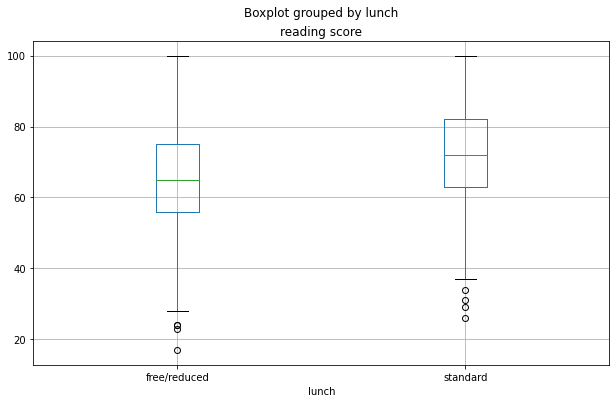

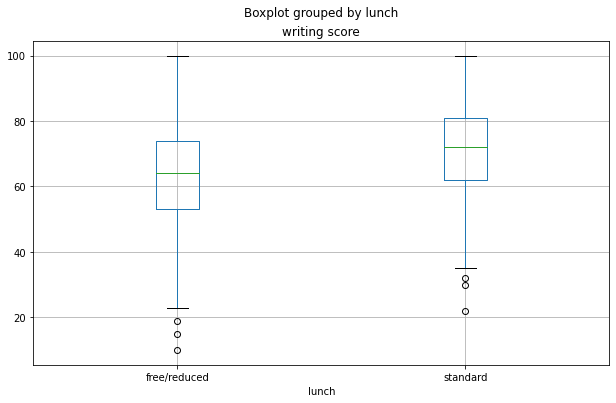

In [75]:
# box-plot to get the average difference in values:

score_data.boxplot('math score', by = 'lunch', figsize=(10,6))
score_data.boxplot('reading score', by = 'lunch', figsize=(10,6))
score_data.boxplot('writing score', by = 'lunch', figsize=(10,6))

> **Interpretation:** The average difference in the math, reading and writing components are approximately found to be 11, 7 and 7.8 respectively for the lunch variable.

>**e.Test Preparation Score:** For testing the last hypothesis, the data is split into to separate dataframes for the two preparation modes. First I will check if the scores follow a normal distruibution visually using a histogram, then with the values of skewness and kurtosis (descriptive statistics). If the distribution of scores appear normal, an independent sample t-test will be performed between the two genders.

-----------------------------------------
 MATH SCORE 
-----------------------------------------


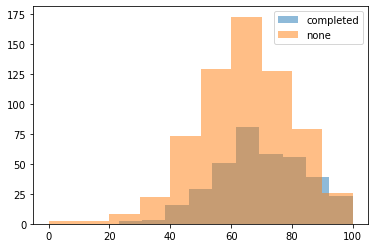

DescribeResult(nobs=355, minmax=(0, 100), mean=58.92112676056338, variance=229.82426991326489, skewness=-0.3103669047566783, kurtosis=0.37574742282962337)
DescribeResult(nobs=645, minmax=(19, 100), mean=70.03410852713178, variance=186.41808946025327, skewness=-0.10227791528025207, kurtosis=-0.14724460660398364)


ShapiroResult(statistic=0.9924980998039246, pvalue=0.07163193076848984)
ShapiroResult(statistic=0.9944112300872803, pvalue=0.018129942938685417)


-----------------------------------------
 READING SCORE 
-----------------------------------------


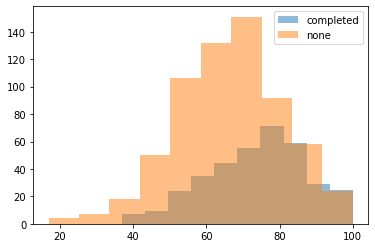

DescribeResult(nobs=355, minmax=(17, 100), mean=64.65352112676057, variance=221.87113869658629, skewness=-0.2357872948469079, kurtosis=-0.01864720452897517)
DescribeResult(nobs=645, minmax=(26, 100), mean=71.65426356589147, variance=191.28556020992824, skewness=-0.21159651296215973, kurtosis=-0.23106807838349042)


ShapiroResult(statistic=0.9934403896331787, pvalue=0.12586839497089386)
ShapiroResult(statistic=0.9925457835197449, pvalue=0.0026014416944235563)


-----------------------------------------
 WRITING SCORE 
-----------------------------------------


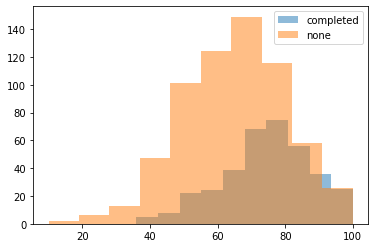

DescribeResult(nobs=355, minmax=(10, 100), mean=63.02253521126761, variance=238.20288056019737, skewness=-0.252080345609079, kurtosis=0.09846517651106801)
DescribeResult(nobs=645, minmax=(22, 100), mean=70.8232558139535, variance=205.62088689874338, skewness=-0.25336629439307656, kurtosis=-0.23923873356757985)


ShapiroResult(statistic=0.9937123656272888, pvalue=0.14779680967330933)
ShapiroResult(statistic=0.9907597303390503, pvalue=0.00045595125993713737)




In [68]:
#visual, descriptive statistics and Shapiro-Wilk

for var in ["math score", "reading score", "writing score"]:
  print("-----------------------------------------")
  print(" {} ".format(var).upper())
  print("-----------------------------------------")
  plt.hist(score_data[score_data["test preparation course"] == "completed"][var], alpha = .5, label='completed')
  plt.hist(score_data[score_data["test preparation course"] == "none"][var], alpha = .5, label='none')
  plt.legend()
  plt.show()

  print(stats.describe(score_data[score_data.lunch == "free/reduced"][var]))
  print(stats.describe(score_data[score_data.lunch == "standard"][var]))
  
  print("\n")
  print(stats.shapiro(score_data[score_data.lunch == "free/reduced"][var]))
  print(stats.shapiro(score_data[score_data.lunch == "standard"][var]))
  print("\n")

> The histograms of the various scores are normally distributed and the values of skewness and kurtosis is within the specific range of normality. It is a good idea to check for normality with a statistical test before we proceed any further.  We use Shapiro Wilk here. The W statistic value from the Shapiro - Wilk test for all the 3 scores is close to 1 and it indicates that the distribution is close to normal.  

In [ ]:
# Perform t-test

stats.ttest_ind(score_data[score_data["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          score_data[score_data["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

> **Interpretation:** Based on a visual inspection, the values of skewness, kurtosis being within the range(descriptive statistics), and Shapiro_wilk, indicate that scores are close enough to normally distributed. So, I proceeded with the t-test. Based on a p-value of 0.01, I **reject the null**.  There **is significant difference** in scores between the **test preparation course values** for all 3 scores.  The following mean values illustrates the results along with the box-plots that help us see the average differences in values.

In [50]:
# mean values with test prep course as variable
score_data.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


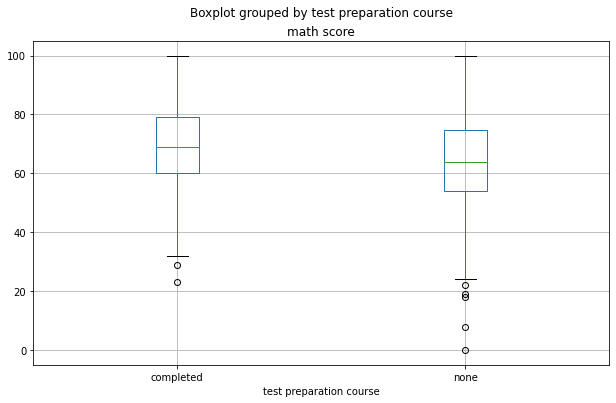

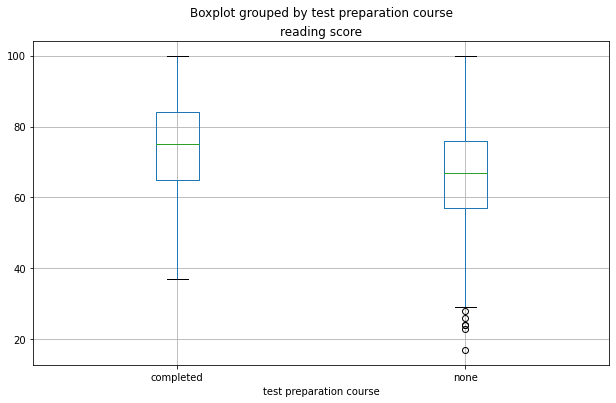

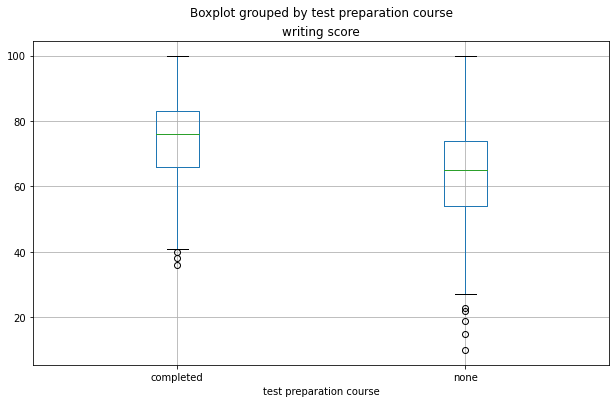

In [74]:
# box-plot to get the average difference in values:

score_data.boxplot('math score', by = 'test preparation course', figsize=(10,6))
score_data.boxplot('reading score', by = 'test preparation course', figsize=(10,6))
score_data.boxplot('writing score', by = 'test preparation course', figsize=(10,6))

> **Interpretation:** The average difference in the math, reading and writing components are approximately found to be 4.9, 7.3 and 10 respectively for the test preparation course variable.

**5. Results:**

> 1. Yes, **there is significant difference** in the **scores of male and female students** in all the three testing components namely math, reading and writing.
In **Math**, male students are performing better than female students.
In **Reading**, female students are performing better than male students.
In **Writing**, female students are performing better than male students.
The **average difference** in the math, reading and writing components are approximately found to be **5.1, -7.2 and -9.1** respectively for the gender variable. (Negative value means the second group is outperforming.)

> 2. From the t-tests results, it is apparent that groups A, B, C are different from groups D and E.
In **Math scores**, group **E is different** from the rest of A, B, C and D. Also, group D is different from A, B, and E.
In **Reading scores**, group **A, B and C are similar** but otherwise every other group is different.
In **Writing scores**, **A, and B are similar** and **D, E are similar** to each other. **Group E outperforms** every other group in all three scores.  The **average difference** in highest and lowest scores in those categories are **12.2, 8.3 and 8.7.**  Performance of **group A is the lowest** in this category.

> 3. From the t-test results, the scores of students in **Math**, with parents with any **college degree is different** from those with only high school degrees.  The scores of students in **Reading**, with parents with **Masters,Bachelors, or Associate degree is different(similar amongst them)** from the rest. There is no difference in the scores between high school or some high school groups.  The scores of students in **Writing**, with parents **Bachelors and Masters degree** is different from those with only high school degrees.  From this boxplot we can understand that students with parents having **Masters degree outperform** every other group in all three scores.  The **average difference** in highest and lowest scores in those categories are **7.6, 10.7 and 13.23.7.**  Performance of students with parents with **high school** qualification is the **lowest** in this category.   

> 4. From the t-test and the mean results, there is significant difference in the scores of students with Lunch preference in all the three testing components namely math, reading and writing. The students with Lunch preference **"Standard"**, have **better scores** in all three categories.  The **average difference** in the math, reading and writing components are approximately found to be **11, 7 and 7.8** respectively for the lunch variable.

> 5. The two groups with Test preparation course complete and none, have significantly different performances in the exams. The **completed group performs better** in all components of the test. The **average difference** in the math, reading and writing components are approximately found to be **4.9, 7.3 and 10** respectively for the test preparation course variable.

**6. Discussion and recommendation:**

> We studied the student test scores in three different categories with respect to five different variables.  Although, the data is genereic without any information about the location of the student, it is an important variable.  Such studies should be conducted with respect to a state or a city to be more specific.  So sampling bias is most common in such data.  Getting a sample representative of the population which represents the entire country can be extremely difficult in such small datasets.  in addition to all the variables in the dataset, an additional variable which describes the availability of external help or internet access can be very valuable to the discussion. 